<h1> Analysis to find what factors - driver behavior and characteristics are predictive of coupon acceptance </h1>

<h2> The notebook is divided into 4 sections </h2>
<h3> Section 1: Goal and Context for the project </h3>
<h3> Section 2: Data Description, profiling and and data clean up </h3>
<h3> Section 3: Investigation of Bar Coupons </h3>
<h3> Section 4: Investigation of Coffee House Coupons </h3>

<h2> Section 1: Goal and Context for the project </h2>

### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





<h2> Section 2: Data Description, profiling and and data clean up </h2>

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [493]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [495]:
pwd

'C:\\Users\\arup0'

In [496]:
data = pd.read_csv('data/coupons.csv')

In [497]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

**Aproach used to investigate missing data**
* Used data.info to profile the columns
* Used isna.sum() to count number of nulls in each column
* Used fillna to replace the nulls in each column with "N/A" instead of dropping data
* Created a data_clean dataframe with the null data filled out
* Will be using the data_clean dataframe for all analysis in the code

In [500]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [501]:
count_nulls=data.isna().sum()
count_nulls

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [503]:
data_clean=data.fillna({"car":"N/A", "Bar":"N/A", "CoffeeHouse":"N/A", "CarryAway":"N/A", "RestaurantLessThan20":"N/A", "Restaurant20To50":"N/A"})
check_nulls=data_clean.isna().sum()
check_nulls

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



**Approach to calculate proportion of coupons accepted**
* Used value counts on 'Y' column to count the number of instances of 1 or 0 and store it in a dataframe
* Calculated the percent of 'Y' with 1 of the total records 

In [506]:
coupon_dist=data_clean['Y'].value_counts()
coupon_dist

Y
1    7210
0    5474
Name: count, dtype: int64

In [507]:
total_count=coupon_dist[1] + coupon_dist[0]
portion_accepted=coupon_dist[1]/total_count
portion_percent= "{:.0%}".format(portion_accepted)
print(f"The portion of consumers accepted coupons {portion_percent}")

The portion of consumers accepted coupons 57%


5. Use a bar plot to visualize the `coupon` column.

**Visualization approach**
* Used seaborn countplot to visualize the distribution of coupons

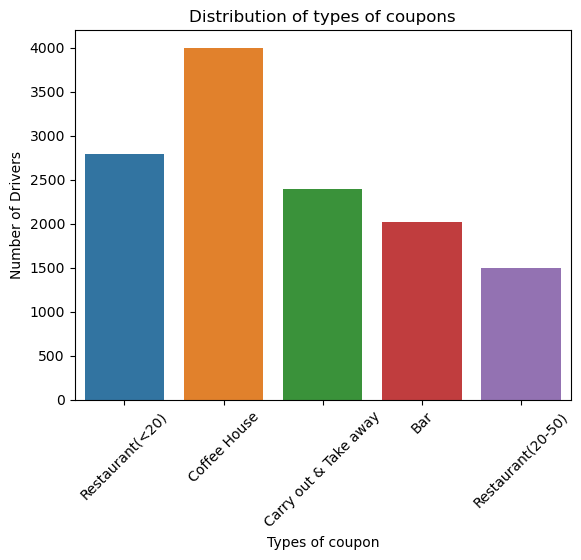

In [510]:
coupon_plot=sns.countplot(x='coupon', data=data_clean)
coupon_plot.set_xticklabels(coupon_plot.get_xticklabels(), rotation=45)
plt.xlabel("Types of coupon")
plt.ylabel("Number of Drivers")
plt.title("Distribution of types of coupons")
plt.show()

6. Use a histogram to visualize the temperature column.

**Visualization approach**
* Used seaborn countplot to visualize the distribution of coupons

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


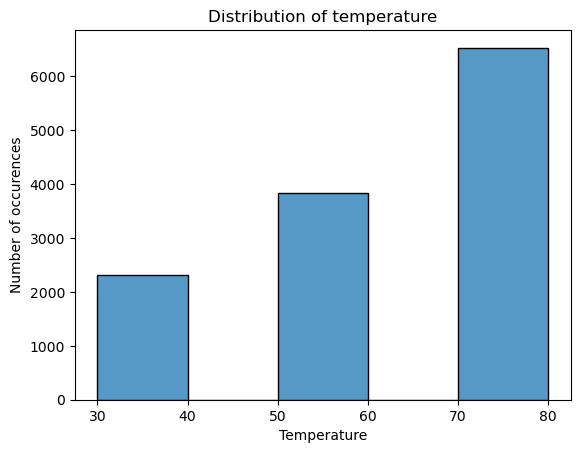

In [513]:
sns.histplot(x='temperature', bins=5, data=data_clean)
plt.xlabel("Temperature")
plt.ylabel("Number of occurences")
plt.title("Distribution of temperature")
plt.show()

<h2>Section 3: Investigation of Bar Coupons </h2>

<h3>Factors that predict drivers accepting bar coupon</h3>
<h4>Primary predictive variable: Visits to a bar </h4>
<h4>Drivers who have visted Bar 3 or more times a month are more likely to accept bar coupons - 77% vs 37% for all others </h4><h4>Drivers who have visited Bar 1 or more times a month and are over the ages 25 are more likely to accept bar coupons  - 70% vs 33% for all others </h4>
<h4>Drivers who have visited Bar 1 or more times a month and are under the age of 30 are more likely to accept bar coupons - 72% vs 35% for all others </h4>
<h4>Drivers who have visted Bar 1 or more times a month and drove with a passenger who is not a kid and is not widowed are more likely to accept bar coupons - 72% vs 38% for all others </h4>
<h4>Drivers who have visted Bar 1 or more times a month and drove with a passenger who is not a kid and have an occupation other than Farming, Fishing & Foresare more likely to accept bar coupons try - 72%% vs 38% for all others</h4>


<h3> Implications and Next Steps - To drive higher acceptance of bar coupons </h3>
<h4>Collect the following profile data about drivers who you want to offer bar coupons</h4>
<h5>Average visits to a bar in a month </h5>
<h5>Age</h5>
<h5>Marital Status</h5>
<h5>Occupation</h5>
<h5>Driving behavior - who they drive with and at what times </h5>
<h4> Offer bar coupons to drivers who fit the following profiles</h4>
<h5>Visit a bar more than 3 times a month</h5>
<h5>Visit a bar atleast once a month and </h5>
<h5>* Are between the ages of 25 and 30 OR </h5>
<h5>* Are not widowed and at a time when the driving with a passenger who is not a kid OR </h5>
<h5>* Are not employed in Farming, Fishing or Forestry and drive with a passenger who is not a kid</h5>

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [518]:
bar_data=data_clean.loc[data_clean['coupon']=='Bar']
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [520]:
coupon_bar_dist=bar_data['Y'].value_counts()
total_bar_coupon=coupon_bar_dist[1] + coupon_bar_dist[0]
portion_bar_accepted=coupon_bar_dist[1]/total_bar_coupon
portion_bar_percent= "{:.0%}".format(portion_bar_accepted)
print(f"The portion of consumers accepted bar coupons {portion_bar_percent}")

The portion of consumers accepted bar coupons 41%


**In subsequent sections analyzed to compare bar coupon acceptance rate between two groups of consumers**
**Approach to compare acceptance rate between two groups**
* If a target group is defined based on conditions of multiple categorical variables, we use the following approach*
* Let's take an example: target group : drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
* Created a column 'bar_more1' as a boolean value and set it to True if Bar categorical variable indicates driver visited bar more than once else False
* Created a column 'psngr_nokids' as a boolean value and set it to True if "passanger" categorical variable indicates driver was driving with a passenger who is not a kid
* Create a column 'target_occup'as a boolean value and set it to True if the "occupation" categorical variable is not equals farming, fishing, or forestry else, False
* Create a column 'target_grp' as a boolean value and is equal to df['bar_more1'] & df['psngr_nokids'] & df['target_occup'] where df is the name of the dataframe
* Using the boolean variable 'target_grp' created two views of the dataframe
* Dataframe "target_group_coupon" with 'target_group' value as true - and calculated % of rows with 'Y' as 1 (acceptance of coupons who are part of the target group)
* Dataframe "nontarget_group_coupon" with 'target_group' value as false - and calculated % of rows with 'Y' as 1 (acceptance of coupons who are not members of the target group)
* Visualized the difference in acceptance rate using Seaborn catplot with x variable as 'bar_3orless'  with hue as 'Y'

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


**Approach to set up the data**
* Used value counts to profile the distribution of 'Bar' categorical variable
* Filtered out the rows of data that 'Bar' has N/A - a created bar_data_clean data frame
* bar_data_clean will be used for all analysis for bar coupons

In [523]:
bar_visit_dist=bar_data['Bar'].value_counts()
bar_visit_dist

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
N/A       21
Name: count, dtype: int64

In [524]:
# Eliminating the N/A 
bar_data_clean = bar_data.loc[bar_data['Bar'] != 'N/A']

In [525]:
bar_visits3_coupon=bar_data_clean.copy()
bar_visits3_coupon.loc[:,'bar_3orless']= bar_visits3_coupon['Bar'].apply(lambda x:x in ['1~3','less1','never'])
bar_visits3_coupon=bar_visits3_coupon.loc[:,['Y', 'bar_3orless']]
bar_visits3less_coupon=bar_visits3_coupon[bar_visits3_coupon['bar_3orless']]
bar_visits3less_coupon_acc=bar_visits3less_coupon['Y'].value_counts().get(1,0)
bar_visits3less_coupon_noacc=bar_visits3less_coupon['Y'].value_counts().get(0,0)
bar_visit3less_total=bar_visits3less_coupon_acc+bar_visits3less_coupon_noacc
bar_visit3less_coupon_acc_rate=bar_visits3less_coupon_acc/bar_visit3less_total
bar_visit3less_coupon_acc_percent= "{:.0%}".format(bar_visit3less_coupon_acc_rate)
print(f"Drivers visited bar 3 or less number of times accepted coupons at the rate of {bar_visit3less_coupon_acc_percent}")
bar_visits3more_coupon=bar_visits3_coupon[bar_visits3_coupon['bar_3orless'] == False]
bar_visits3more_coupon_acc=bar_visits3more_coupon['Y'].value_counts().get(1,0)
bar_visits3more_coupon_noacc=bar_visits3more_coupon['Y'].value_counts().get(0,0)
bar_visit3more_total=bar_visits3more_coupon_acc+bar_visits3more_coupon_noacc
bar_visit3more_coupon_acc_rate=bar_visits3more_coupon_acc/bar_visit3more_total
bar_visit3more_coupon_acc_percent= "{:.0%}".format(bar_visit3more_coupon_acc_rate)
print(f"Drivers visited bar 3 or more number of times accepted coupons at the rate of {bar_visit3more_coupon_acc_percent}")

Drivers visited bar 3 or less number of times accepted coupons at the rate of 37%
Drivers visited bar 3 or more number of times accepted coupons at the rate of 77%


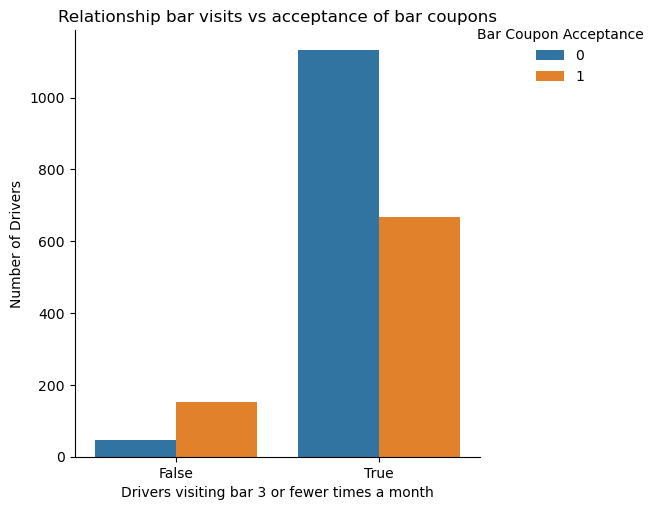

In [526]:
#visualizing the data
bar_visits3_plotdata=bar_visits3_coupon.copy()
bar_visits3_plotdata['Y']=bar_visits3_plotdata['Y'].astype(str)
g=sns.catplot(x='bar_3orless',hue='Y', kind='count', data=bar_visits3_plotdata)
g._legend.set_title("Bar Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Drivers visiting bar 3 or fewer times a month")
plt.ylabel("Number of Drivers")
plt.title("Relationship bar visits vs acceptance of bar coupons")
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [528]:
age_dist=bar_data_clean['age'].value_counts()
age_dist

age
21         416
26         392
31         334
50plus     281
36         206
41         171
46         109
below21     87
Name: count, dtype: int64

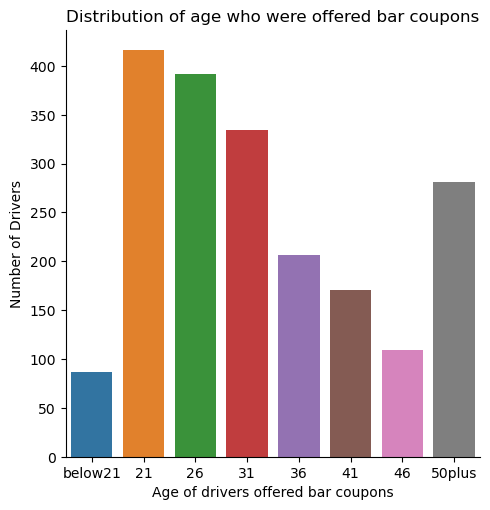

In [696]:
age_order=['below21', '21', '26','31','36', '41', '46', '50plus']
bar_plotdata=bar_data_clean.copy()
bar_plotdata['Y']=bar_plotdata['Y'].astype(str)
g=sns.catplot(x='age', kind='count', data=bar_plotdata, order=age_order)
plt.xlabel("Age of drivers offered bar coupons")
plt.ylabel("Number of Drivers")
plt.title("Distribution of age who were offered bar coupons")
plt.show()

In [529]:
bar_visit1more_age25more=bar_data_clean.copy()
bar_visit1more_age25more.loc[:,'bar_more1']= bar_visit1more_age25more['Bar'].apply(lambda x:x in ['1~3','4~8','gt8'])
bar_visit1more_age25more.loc[:,'Age_more_25']=bar_visit1more_age25more['age'].apply(lambda x: False if x in ['21', 'below21'] else True)
bar_visit1more_age25more['targetgrp']=bar_visit1more_age25more['bar_more1'] & bar_visit1more_age25more['Age_more_25']
bar_visit1more_age25more=bar_visit1more_age25more.loc[:,['Y', 'targetgrp']]
bar_visit1more_age25more_filtered=bar_visit1more_age25more[bar_visit1more_age25more['targetgrp']]
vist1more_age25more_coupon_acc=bar_visit1more_age25more_filtered['Y'].value_counts().get(1,0)
vist1more_age25more_coupon_noacc=bar_visit1more_age25more_filtered['Y'].value_counts().get(0,0)
vist1more_age25more_total=vist1more_age25more_coupon_acc + vist1more_age25more_coupon_noacc
vist1more_age25more_acc_rate=vist1more_age25more_coupon_acc/vist1more_age25more_total
vist1more_age25more_acc_percent="{:.0%}".format(vist1more_age25more_acc_rate)
print(f"The portion of drivers who are above 25 and who go to a bar more than once a month accepted bar coupons {vist1more_age25more_acc_percent}")
bar_visit1more_age25more_nontarget=bar_visit1more_age25more[bar_visit1more_age25more['targetgrp'] == False]
vist1less_age25less_coupon_acc=bar_visit1more_age25more_nontarget['Y'].value_counts().get(1,0)
vist1less_age25less_coupon_noacc=bar_visit1more_age25more_nontarget['Y'].value_counts().get(0,0)
vist1less_age25less_total=vist1less_age25less_coupon_acc + vist1less_age25less_coupon_noacc
vist1less_age25less_acc_rate=vist1less_age25less_coupon_acc/vist1less_age25less_total
vist1less_age25less_acc_percent="{:.0%}".format(vist1less_age25less_acc_rate)
print(f"The portion of all other drivers accepted bar coupons {vist1less_age25less_acc_percent}")

The portion of drivers who are above 25 and who go to a bar more than once a month accepted bar coupons 70%
The portion of all other drivers accepted bar coupons 33%


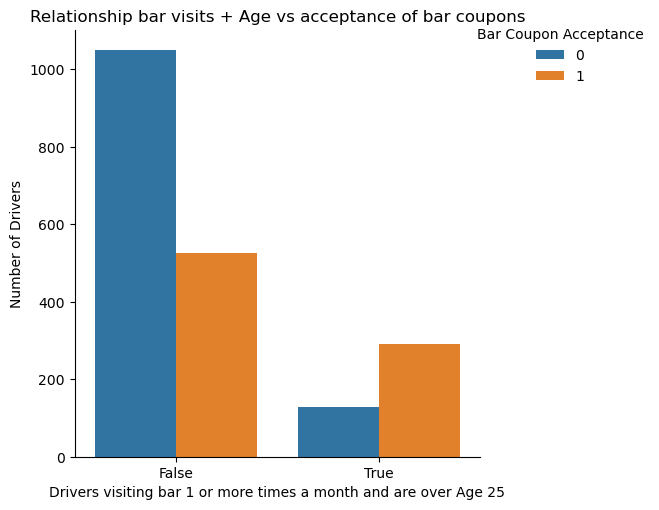

In [530]:
bar_visits_age_plotdata=bar_visit1more_age25more.copy()
bar_visits_age_plotdata['Y']=bar_visits_age_plotdata['Y'].astype(str)
g=sns.catplot(x='targetgrp',hue='Y', kind='count', data=bar_visits_age_plotdata)
g._legend.set_title("Bar Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Drivers visiting bar 1 or more times a month and are over Age 25")
plt.ylabel("Number of Drivers")
plt.title("Relationship bar visits + Age vs acceptance of bar coupons")
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [532]:
bar_data_passanger=bar_data_clean['passanger'].value_counts()
bar_data_passanger

passanger
Alone        1192
Friend(s)     331
Partner       270
Kid(s)        203
Name: count, dtype: int64

In [533]:
bar_data_occupation=bar_data_clean['occupation'].value_counts()
bar_data_occupation

occupation
Unemployed                                   298
Student                                      251
Computer & Mathematical                      228
Sales & Related                              178
Education&Training&Library                   137
Management                                   118
Office & Administrative Support              105
Arts Design Entertainment Sports & Media      91
Business & Financial                          88
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

In [534]:
#cceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
bar_data_prblm5=bar_data_clean.copy()
bar_data_prblm5.loc[:,'bar_more1']= bar_data_prblm5['Bar'].apply(lambda x:x in ['1~3','4~8','gt8'])
bar_data_prblm5.loc[:,'psngr_nokids']= bar_data_prblm5['passanger'].apply(lambda x: x in ['Friend(s)', 'Partner'])
bar_data_prblm5.loc[:,'target_occup']=bar_data_prblm5['occupation'].apply(lambda x: False if x in ['Farming Fishing & Forestry'] else True)
bar_data_prblm5['targetgrp']=bar_data_prblm5['bar_more1'] & bar_data_prblm5['psngr_nokids'] & bar_data_prblm5['target_occup']
bar_data_prblm5=bar_data_prblm5.loc[:,['Y', 'targetgrp']]
bar_data_prblm5_filtered=bar_data_prblm5[bar_data_prblm5['targetgrp']]
prblm5_coupon_acc=bar_data_prblm5_filtered['Y'].value_counts().get(1,0)
prblm5_coupon_noacc=bar_data_prblm5_filtered['Y'].value_counts().get(0,0)
prblm5_coupon_total=prblm5_coupon_acc+prblm5_coupon_noacc
prblm5_coupon_acc_rate=prblm5_coupon_acc/prblm5_coupon_total
prblm5_coupon_acc_percent="{:.0%}".format(prblm5_coupon_acc_rate)
print(f"The portion of drivers who go to a bar 1+ month with a passenger  not a kid and is not in Farming, Fishing & Forestry accepted bar coupons {prblm5_coupon_acc_percent}")
bar_data_prblm5_nontarget=bar_data_prblm5[bar_data_prblm5['targetgrp'] == False]
prblm5_nontarget_coupon_acc=bar_data_prblm5_nontarget['Y'].value_counts().get(1,0)
prblm5_nontarget_coupon_noacc=bar_data_prblm5_nontarget['Y'].value_counts().get(0,0)
prblm5_nontarget_coupon_total=prblm5_nontarget_coupon_acc+prblm5_nontarget_coupon_noacc
prblm5_nontarget_coupon_acc_rate=prblm5_nontarget_coupon_acc/prblm5_nontarget_coupon_total
prblm5_nontarget_coupon_acc_percent="{:.0%}".format(prblm5_nontarget_coupon_acc_rate)
print(f"The portion of all other drivers accepted bar coupons at the rate {prblm5_nontarget_coupon_acc_percent}")

The portion of drivers who go to a bar 1+ month with a passenger  not a kid and is not in Farming, Fishing & Forestry accepted bar coupons 72%
The portion of all other drivers accepted bar coupons at the rate 38%


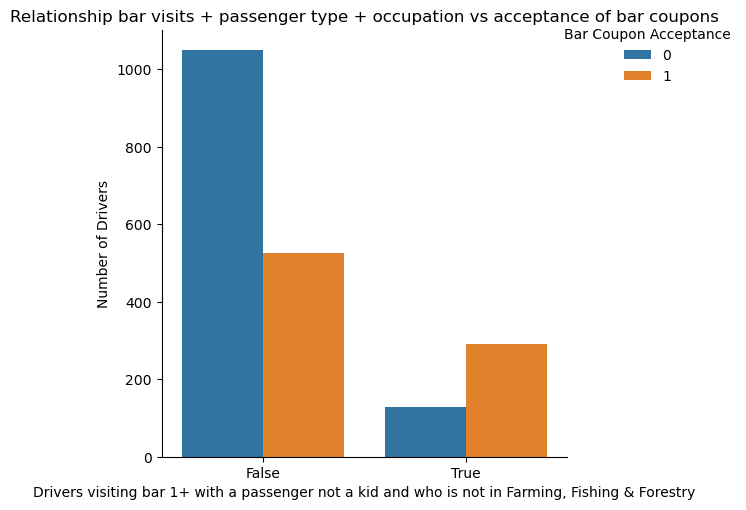

In [535]:
bar_data_prblm5_plotdata=bar_data_prblm5.copy()
bar_data_prblm5_plotdata['Y']=bar_data_prblm5_plotdata['Y'].astype(str)
g=sns.catplot(x='targetgrp',hue='Y', kind='count', data=bar_visits_age_plotdata)
g._legend.set_title("Bar Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Drivers visiting bar 1+ with a passenger not a kid and who is not in Farming, Fishing & Forestry")
plt.ylabel("Number of Drivers")
plt.title("Relationship bar visits + passenger type + occupation vs acceptance of bar coupons")
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [537]:
income_groups=bar_data_clean['income'].value_counts()
income_groups

income
$25000 - $37499     317
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     261
$50000 - $62499     257
Less than $12500    164
$75000 - $87499     147
$87500 - $99999     142
$62500 - $74999     129
Name: count, dtype: int64

In [538]:
marital_status=bar_data_clean['maritalStatus'].value_counts()
marital_status

maritalStatus
Married partner      871
Single               655
Unmarried partner    376
Divorced              73
Widowed               21
Name: count, dtype: int64

In [539]:
age_dist=bar_data_clean['age'].value_counts()
age_dist

age
21         416
26         392
31         334
50plus     281
36         206
41         171
46         109
below21     87
Name: count, dtype: int64

In [540]:
cheapRest_dist=bar_data_clean['RestaurantLessThan20'].value_counts()
cheapRest_dist

RestaurantLessThan20
1~3      871
4~8      563
less1    325
gt8      186
never     37
N/A       14
Name: count, dtype: int64

In [541]:
bar_data_clean = bar_data.loc[bar_data['Bar'] != 'N/A']
bar_data_prblm6=bar_data_clean.copy()

In [704]:
bar_data_prblm6.loc[:,'psngr_nokids']= bar_data_prblm6['passanger'].apply(lambda x: x in ['Friend(s)', 'Partner'])
bar_data_prblm6.loc[:,'notwidowed']=bar_data_prblm6['maritalStatus'].apply(lambda x: False if x in ['Widowed'] else True)
bar_data_prblm6.loc[:,'bar_more1']= bar_data_prblm6['Bar'].apply(lambda x:x in ['1~3','4~8','gt8'])
bar_data_prblm6.loc[:,'agebelow_30']= bar_data_prblm6['age'].apply(lambda x: x in ['21', '26','below21'])
bar_data_prblm6.loc[:,'incomebelow_50K']= bar_data_prblm6['income'].apply(lambda x: x in ['$25000 - $37499', '$12500 - $24999','$37500 - $49999', 'Less than $12500'])
bar_data_prblm6.loc[:,'cheapRest_4more']=bar_data_prblm6['RestaurantLessThan20'].apply(lambda x: x in ['4~8', 'gt8'])

In [543]:
#Setting up the group variables
#Group 1 : go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_data_prblm6['group1']=bar_data_prblm6['psngr_nokids'] & bar_data_prblm6['bar_more1'] & bar_data_prblm6['notwidowed']
bar_data_group1_dist = bar_data_prblm6['group1'].value_counts()
bar_data_group1_dist

group1
False    1801
True      195
Name: count, dtype: int64

In [544]:
#Group 2 go to bars more than once a month and are under the age of 30 *OR*
bar_data_prblm6['group2']=bar_data_prblm6['agebelow_30'] & bar_data_prblm6['bar_more1']
bar_data_group2_dist = bar_data_prblm6['group2'].value_counts()
bar_data_group2_dist

group2
False    1651
True      345
Name: count, dtype: int64

In [545]:
# Group 3 go to cheap restaurants more than 4 times a month and income is less than 50K. 
bar_data_prblm6['group3']=bar_data_prblm6['cheapRest_4more'] & bar_data_prblm6['incomebelow_50K']
bar_data_group3_dist = bar_data_prblm6['group3'].value_counts()
bar_data_group3_dist

group3
False    1657
True      339
Name: count, dtype: int64

In [546]:
#acceptance rate of Group1 go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_data_prblm6_group1=bar_data_prblm6.copy()
bar_data_prblm6_group1=bar_data_prblm6_group1.loc[:,['Y', 'group1']]
bar_data_prblm6_group1_filtered=bar_data_prblm6_group1[bar_data_prblm6_group1['group1']]
group1_coupon_acc=bar_data_prblm6_group1_filtered['Y'].value_counts().get(1,0)
group1_coupon_noacc=bar_data_prblm6_group1_filtered['Y'].value_counts().get(0,0)
group1_total=group1_coupon_acc+group1_coupon_noacc
group1_total_acc_rate=group1_coupon_acc/group1_total
group1_total_acc_percent="{:.0%}".format(group1_total_acc_rate)
bar_data_prblm6_group1_non=bar_data_prblm6_group1[bar_data_prblm6_group1['group1'] == False]
nongroup1_coupon_acc=bar_data_prblm6_group1_non['Y'].value_counts().get(1,0)
nongroup1_coupon_noacc=bar_data_prblm6_group1_non['Y'].value_counts().get(0,0)
nongroup1_total=nongroup1_coupon_acc+nongroup1_coupon_noacc
nongroup1_total_acc_rate=nongroup1_coupon_acc/nongroup1_total
nongroup1_total_acc_percent="{:.0%}".format(nongroup1_total_acc_rate)
print(f"Coupon acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is {group1_total_acc_percent}")
print(f"Coupon acceptance rate for all other drivers is {nongroup1_total_acc_percent}")

Coupon acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 72%
Coupon acceptance rate for all other drivers is 38%


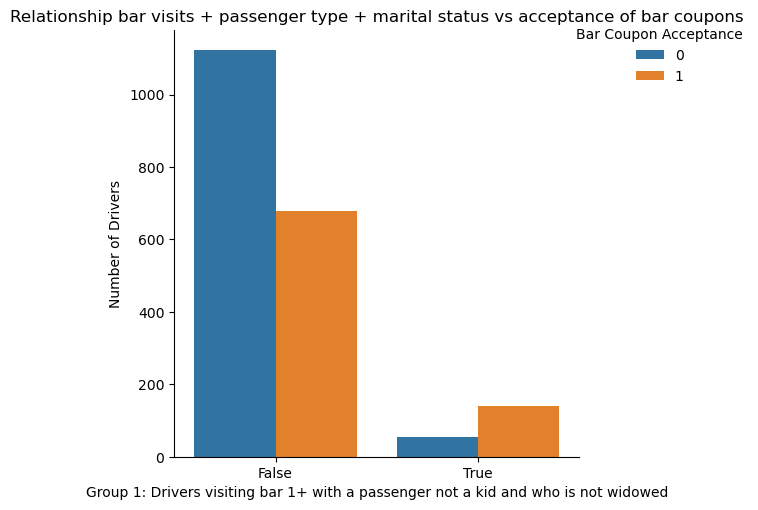

In [547]:
bar_data_prblm6_group1_plotdata=bar_data_prblm6_group1.copy()
bar_data_prblm6_group1_plotdata['Y']=bar_data_prblm6_group1_plotdata['Y'].astype(str)
g=sns.catplot(x='group1',hue='Y', kind='count', data=bar_data_prblm6_group1_plotdata)
g._legend.set_title("Bar Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Group 1: Drivers visiting bar 1+ with a passenger not a kid and who is not widowed")
plt.ylabel("Number of Drivers")
plt.title("Relationship bar visits + passenger type + marital status vs acceptance of bar coupons")
plt.show()

In [548]:
# acceptance rate of Group 2 : go to bars more than once a month and are under the age of 30
bar_data_prblm6_group2=bar_data_prblm6.copy()
bar_data_prblm6_group2=bar_data_prblm6_group2.loc[:,['Y', 'group2']]
bar_data_prblm6_group2_filtered=bar_data_prblm6_group2[bar_data_prblm6_group2['group2']]
group2_coupon_acc=bar_data_prblm6_group2_filtered['Y'].value_counts().get(1,0)
group2_coupon_noacc=bar_data_prblm6_group2_filtered['Y'].value_counts().get(0,0)
group2_total=group2_coupon_acc+group2_coupon_noacc
group2_total_acc_rate=group2_coupon_acc/group2_total
group2_total_acc_percent="{:.0%}".format(group2_total_acc_rate)
bar_data_prblm6_nongroup2_filtered=bar_data_prblm6_group2[bar_data_prblm6_group2['group2'] == False]
nongroup2_coupon_acc=bar_data_prblm6_nongroup2_filtered['Y'].value_counts().get(1,0)
nongroup2_coupon_noacc=bar_data_prblm6_nongroup2_filtered['Y'].value_counts().get(0,0)
nongroup2_total=nongroup2_coupon_acc+nongroup2_coupon_noacc
nongroup2_total_acc_rate=nongroup2_coupon_acc/nongroup2_total
nongroup2_total_acc_percent="{:.0%}".format(nongroup2_total_acc_rate)
print(f"Coupon acceptance rate for drivers who go to bars more than once a month and are the under the age of 30 is {group2_total_acc_percent}")
print(f"Coupon acceptance rate for all other drivers is {nongroup2_total_acc_percent}")

Coupon acceptance rate for drivers who go to bars more than once a month and are the under the age of 30 is 72%
Coupon acceptance rate for all other drivers is 35%


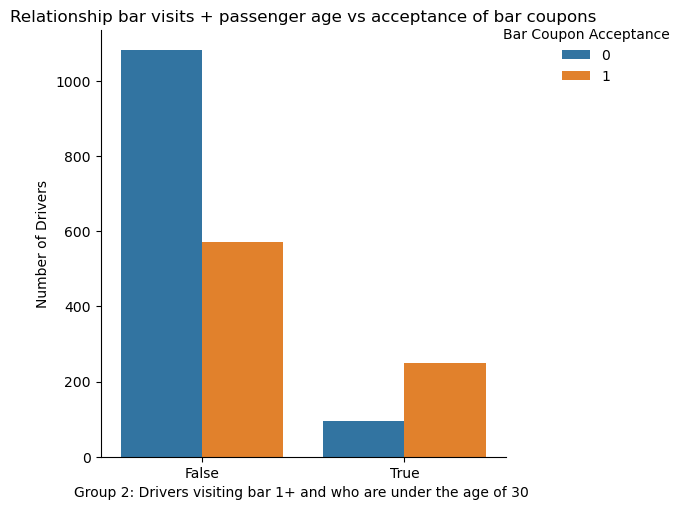

In [549]:
bar_data_prblm6_group2_plotdata=bar_data_prblm6_group2.copy()
bar_data_prblm6_group2_plotdata['Y']=bar_data_prblm6_group2_plotdata['Y'].astype(str)
g=sns.catplot(x='group2',hue='Y', kind='count', data=bar_data_prblm6_group2_plotdata)
g._legend.set_title("Bar Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Group 2: Drivers visiting bar 1+ and who are under the age of 30 ")
plt.ylabel("Number of Drivers")
plt.title("Relationship bar visits + passenger age vs acceptance of bar coupons")
plt.show()

In [550]:
# acceptance rate of Group 3 : go to cheap restaurants more than 4 times a month and income is less than 50K. 
bar_data_prblm6_group3=bar_data_prblm6.copy()
bar_data_prblm6_group3=bar_data_prblm6_group3.loc[:,['Y', 'group3']]
bar_data_prblm6_group3_filtered=bar_data_prblm6_group3[bar_data_prblm6_group3['group3']]
group3_coupon_acc=bar_data_prblm6_group3_filtered['Y'].value_counts().get(1,0)
group3_coupon_noacc=bar_data_prblm6_group3_filtered['Y'].value_counts().get(0,0)
group3_total=group3_coupon_acc+group3_coupon_noacc
group3_total_acc_rate=group3_coupon_acc/group3_total
group3_total_acc_percent="{:.0%}".format(group3_total_acc_rate)
bar_data_prblm6_nongroup3_filtered=bar_data_prblm6_group3[bar_data_prblm6_group3['group3'] == False]
nongroup3_coupon_acc=bar_data_prblm6_nongroup3_filtered['Y'].value_counts().get(1,0)
nongroup3_coupon_noacc=bar_data_prblm6_nongroup3_filtered['Y'].value_counts().get(0,0)
nongroup3_total=nongroup3_coupon_acc+nongroup3_coupon_noacc
nongroup3_total_acc_rate=nongroup3_coupon_acc/nongroup3_total
nongroup3_total_acc_percent="{:.0%}".format(nongroup3_total_acc_rate)
print(f"Coupon acceptance rate for drivers who go go to cheap restaurants more than 4 times a month and income is less than 50K. {group3_total_acc_percent}")
print(f"Coupon acceptance rate for all other drivers is  {nongroup3_total_acc_percent}")

Coupon acceptance rate for drivers who go go to cheap restaurants more than 4 times a month and income is less than 50K. 46%
Coupon acceptance rate for all other drivers is  40%


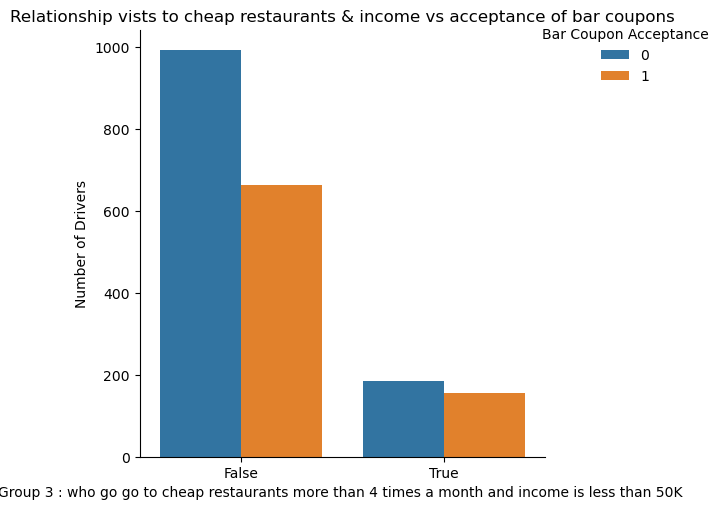

In [551]:
bar_data_prblm6_group3_plotdata=bar_data_prblm6_group3.copy()
bar_data_prblm6_group3_plotdata['Y']=bar_data_prblm6_group3_plotdata['Y'].astype(str)
g=sns.catplot(x='group3',hue='Y', kind='count', data=bar_data_prblm6_group3_plotdata)
g._legend.set_title("Bar Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Group 3 : who go go to cheap restaurants more than 4 times a month and income is less than 50K ")
plt.ylabel("Number of Drivers")
plt.title("Relationship vists to cheap restaurants & income vs acceptance of bar coupons")
plt.show()

In [552]:
#acceptance of group 1 or group 2 or group 3
bar_data_prblm6_targetgroup=bar_data_prblm6.copy()
bar_data_prblm6_targetgroup['targetgroup']=bar_data_prblm6_targetgroup['group1']|bar_data_prblm6_targetgroup['group2']|bar_data_prblm6_targetgroup['group3']
bar_data_prblm6_targetgroup=bar_data_prblm6_targetgroup.loc[:,['Y', 'targetgroup']]
bar_data_prblm6_targetgroup_filtered=bar_data_prblm6_targetgroup[bar_data_prblm6_targetgroup['targetgroup']]
targetgroup_coupon_acc=bar_data_prblm6_targetgroup_filtered['Y'].value_counts().get(1,0)
targetgroup_coupon_noacc=bar_data_prblm6_targetgroup_filtered['Y'].value_counts().get(0,0)
targetgroup_total=targetgroup_coupon_acc+targetgroup_coupon_noacc
targetgroup_total_acc_rate=targetgroup_coupon_acc/targetgroup_total
targetgroup_total_acc_percent="{:.0%}".format(targetgroup_total_acc_rate)
bar_data_prblm6_targetgroup_non=bar_data_prblm6_targetgroup[bar_data_prblm6_targetgroup['targetgroup'] == False]
nontargetgroup_coupon_acc=bar_data_prblm6_targetgroup_non['Y'].value_counts().get(1,0)
nontargetgroup_coupon_noacc=bar_data_prblm6_targetgroup_non['Y'].value_counts().get(0,0)
nontargetgroup_total=nontargetgroup_coupon_acc+nontargetgroup_coupon_noacc
nontargetgroup_total_acc_rate=nontargetgroup_coupon_acc/nontargetgroup_total
nontargetgroup_total_acc_percent="{:.0%}".format(nontargetgroup_total_acc_rate)
print("Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed OR")
print("Drivers who go to bars more than once a month and are the under the age of 30 OR ")
print("Drivers who go go to cheap restaurants more than 4 times a month and income is less than 50K")
print(f"Bar coupon acceptance rate is {targetgroup_total_acc_percent}")
print(f"The bar coupon acceptance rate for all others is {nontargetgroup_total_acc_percent}")

Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
Drivers who go to bars more than once a month and are the under the age of 30 OR 
Drivers who go go to cheap restaurants more than 4 times a month and income is less than 50K
Bar coupon acceptance rate is 57%
The bar coupon acceptance rate for all others is 33%


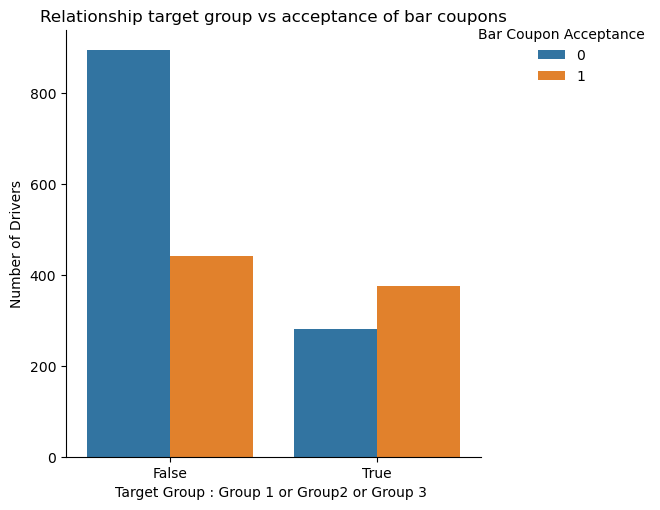

In [553]:
bar_data_prblm6_targetgroup_plotdata=bar_data_prblm6_targetgroup.copy()
bar_data_prblm6_targetgroup_plotdata['Y']=bar_data_prblm6_targetgroup_plotdata['Y'].astype(str)
g=sns.catplot(x='targetgroup',hue='Y', kind='count', data=bar_data_prblm6_targetgroup_plotdata)
g._legend.set_title("Bar Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Target Group : Group 1 or Group2 or Group 3 ")
plt.ylabel("Number of Drivers")
plt.title("Relationship target group vs acceptance of bar coupons")
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Drivers and Bar Coupons** <br>
Hypothesis regarding drivers who accepted bar coupons <br>
* Visted Bar 3 or more times a month - **77%** vs **37%** for all others
* Visited Bar 1 or more times a month and are over the ages 25 -  **70%** vs **33%** for all others
* Visited Bar 1 or more times a month and are under the ages 30 - **72%** vs **35%** for all others
* Visted Bar 1 or more times a month and drove with a passenger who is not a kid and is not widowed - **72%** vs **38%**  for all others 
* Visted Bar 1 or more times a month and drove with a passenger who is not a kid and have an occupation other than Farming, Fishing & Forestry - **72%%** vs **38%** for all others
* Drivers belonging to either of the following groups listed below :  **57%** vs **33%**  for all others 
    * go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
    * go to bars more than once a month and are under the age of 30 OR
    * go to cheap restaurants more than 4 times a month and income is less than 50K.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<h2>Section 4: Investigation of Coffee house coupons</h2>

<h3>Factors that predict drivers accepting coffee house coupon</h3>
<h4>Primary predictive variable: Visits to a coffee house </h4>
<h4>Drivers who have visted coffee house 1 or more times a month are more likely to accept coffee coupons - 66% vs 35% for all others </h4>
<h4>Drivers who have visted coffee house 1 or more times a month and are offered coupon at 10 AM are more likely to accept coffee house coupons  - 81% vs 47% for all others </h4>
<h4>Drivers who have visted coffee house 1 or more times a month and are driving with a friend are more likely to accept coffee house coupons  - 78% vs 46% for all others </h4>
<h4>Drivers who have visted coffee house 1 or more times a month and are below age of 21 are more likely to accept coffee house coupons  - 72% vs 49% for all others </h4>
<h4>Drivers who have visted coffee house 1 or more times a month and are driving to a non-urgent location are more likely to accept coffee house coupons  - 75% vs 44% for all others </h4>
<h4>Drivers who have visted coffee house 1 or more times a month and have income below 50K are more likely to accept coffee house coupons - 70% vs 48% for all others </h4>

<h3> Implications and Next Steps - To drive higher acceptance of coffee house coupons </h3>
<h4>Collect the following profile data about drivers who you want to offer coffee house coupons</h4>
<h5>Average visits to a coffee house in a month </h5>
<h5>Age</h5>
<h5>Income</h5>
<h5>Driving behavior - types of destinations they drive to and at what times</h5>
<h5>Driving behavior - who they drive with and at what times </h5>
<h4> Primarily offer coffee house coupons to drivers who at least visit a coffee house once a month</h4>
<h4>To drive even higher acceptance of coupons target drivers who visit coffee house at least once and also satisfy one of the following conditions</h4>
<h5>* Is driving at around '10 AM' OR  </h5>
<h5>* Is driving to a non urgent location OR </h5>
<h5>* Is driving at a time when he or she is usually with a friend OR </h5>
<h5>* Is below '21' OR</h5>
<h5>* Has income below '50K' </h5>

<h4>***********************************************************************************************</h4>

**Settting up the data**
* Creating a dataframe that has only coffee house coupon data

coffeehouse_data=data_clean.loc[data_clean['coupon']=='Coffee House']
coffeehouse_data.head()

**Calculate the portion of coffee house coupons that were accepted**
* Use value counts on categorical variable "Y" 

In [564]:
coupon_coffee_dist=coffeehouse_data['Y'].value_counts()
coupon_coffee_dist

Y
0    2001
1    1995
Name: count, dtype: int64

In [565]:
total_coffee_coupon=coupon_coffee_dist[1] + coupon_coffee_dist[0]
portion_coffee_accepted=coupon_coffee_dist[1]/total_coffee_coupon
portion_coffee_percent= "{:.0%}".format(portion_coffee_accepted)
print(f"The portion of consumers accepted coffee house coupons {portion_coffee_percent}")

The portion of consumers accepted coffee house coupons 50%


**In subsequent sections analyzed to compare coffee coupon acceptance rate between two groups of consumers**
**Approach to compare acceptance rate between two groups**
* If a target group is defined based on conditions of multiple categorical variables, we use the following approach*
* Let's take an example: target group : drivers who go to coffee house more than once a month and had passenger who were Friend(s) 
* Created a column 'coffee_1ormore' as a boolean value and set it to True if CoffeeHouse categorical variable indicates driver visited coffee house more than once else False
* Created a column 'withFriend' as a boolean value and set it to True if "passanger" categorical variable indicates driver was driving with Friend(s)
* Create a column 'target_grp' as a boolean value and is equal to df['coffee_1ormore'] & df['withFriend'] where df is the name of the dataframe
* Using the boolean variable 'target_grp' created two views of the dataframe
* Dataframe "target_group_coupon" with 'target_group' value as true - and calculated % of rows with 'Y' as 1 (acceptance of coupons who are in the target group)
* Dataframe "nontarget_group_coupon" with 'target_group' value as false - and calculated % of rows with 'Y' as 1 (acceptance of coupons who are not in the target group)
* Visualized the difference in acceptance rate using Seaborn catplot with x variable as 'bar_3orless'  with hue as 'Y'

<h3>Exploring the relationship between coffee house visits and acceptance of coffee house coupons</h3>
<h4>Coffee house visits is a primary predictor of coffee house coupon acceptance</h4>
<h4>Drivers who visit coffee house at least once accept coupons at the rate of 66% vs 35% for all others</h4>

In [567]:
coffee_vist_dist=coffeehouse_data['CoffeeHouse'].value_counts()
coffee_vist_dist

CoffeeHouse
less1    1075
1~3      1042
never     927
4~8       538
gt8       342
N/A        72
Name: count, dtype: int64

In [568]:
# Eliminating the Coffee House N/A
coffeehouse_data_clean = coffeehouse_data.loc[coffeehouse_data['CoffeeHouse'] != 'N/A']
coffee_vist_dist1=coffeehouse_data_clean['CoffeeHouse'].value_counts()
coffee_vist_dist1

CoffeeHouse
less1    1075
1~3      1042
never     927
4~8       538
gt8       342
Name: count, dtype: int64

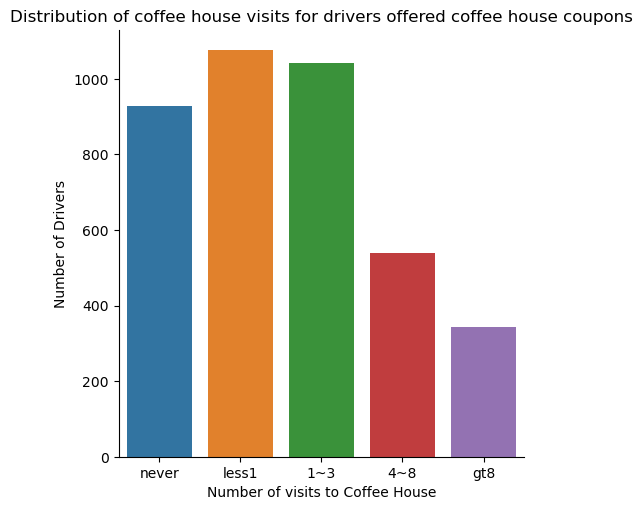

In [569]:
coffee_house_plotdata=coffeehouse_data_clean.copy()
coffee_house_visit_order=['never', 'less1', '1~3', '4~8', 'gt8']
coffee_house_plotdata['Y']=coffee_house_plotdata['Y'].astype(str)
g=sns.catplot(x='CoffeeHouse', kind='count', data=coffee_house_plotdata, order=coffee_house_visit_order)
plt.xlabel("Number of visits to Coffee House")
plt.ylabel("Number of Drivers")
plt.title("Distribution of coffee house visits for drivers offered coffee house coupons")
plt.show()

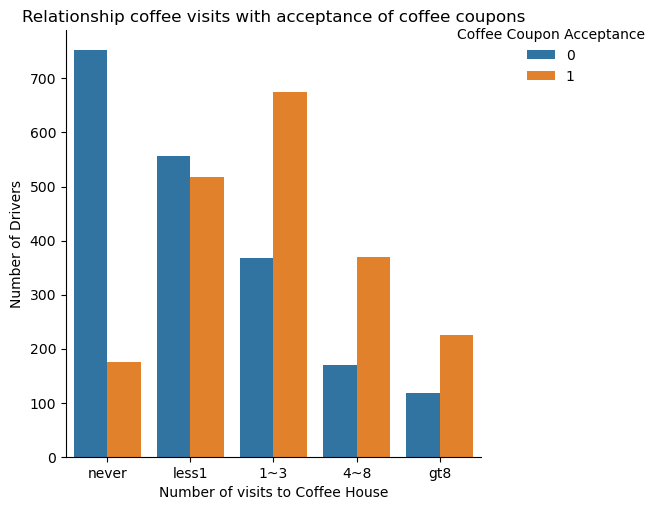

In [570]:
coffee_house_plotdata['Y']=coffee_house_plotdata['Y'].astype(str)
g=sns.catplot(x='CoffeeHouse',hue='Y', kind='count', data=coffee_house_plotdata, order=coffee_house_visit_order)
g._legend.set_title("Coffee Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Number of visits to Coffee House")
plt.ylabel("Number of Drivers")
plt.title("Relationship coffee visits with acceptance of coffee coupons")
plt.show()

In [571]:
coffee_visits1_coupon=coffeehouse_data_clean.copy()
coffee_visits1_coupon.loc[:,'coffee_1orless']= coffee_visits1_coupon['CoffeeHouse'].apply(lambda x:x in ['less1','never'])
coffee_visits1_coupon=coffee_visits1_coupon.loc[:,['Y', 'coffee_1orless']]
coffee_visits1less_coupon=coffee_visits1_coupon[coffee_visits1_coupon['coffee_1orless']]
coffee_visits1less_coupon_acc=coffee_visits1less_coupon['Y'].value_counts().get(1,0)
coffee_visits1less_coupon_noacc=coffee_visits1less_coupon['Y'].value_counts().get(0,0)
coffee_vists1less_total=coffee_visits1less_coupon_acc+coffee_visits1less_coupon_noacc
coffee_vists1less_coupon_acc_rate=coffee_visits1less_coupon_acc/coffee_vists1less_total
coffee_vists1less_coupon_acc_percent= "{:.0%}".format(coffee_vists1less_coupon_acc_rate)
print(f"Drivers visited coffee house 1 or less number of times accepted coupons at the rate of {coffee_vists1less_coupon_acc_percent}")
coffee_visits1more_coupon=coffee_visits1_coupon[coffee_visits1_coupon['coffee_1orless'] == False]
coffee_visits1more_coupon_acc=coffee_visits1more_coupon['Y'].value_counts().get(1,0)
coffee_visits1more_coupon_noacc=coffee_visits1more_coupon['Y'].value_counts().get(0,0)
coffee_vists1more_total=coffee_visits1more_coupon_acc+coffee_visits1more_coupon_noacc
coffee_vists1more_coupon_acc_rate=coffee_visits1more_coupon_acc/coffee_vists1more_total
coffee_vists1more_coupon_acc_percent= "{:.0%}".format(coffee_vists1more_coupon_acc_rate)
print(f"Drivers visited coffee house 1 or more number of times accepted coupons at the rate of {coffee_vists1more_coupon_acc_percent}")

Drivers visited coffee house 1 or less number of times accepted coupons at the rate of 35%
Drivers visited coffee house 1 or more number of times accepted coupons at the rate of 66%


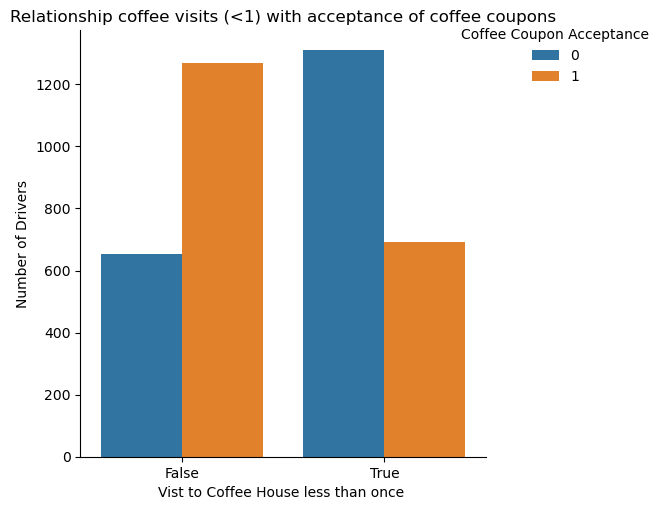

In [572]:
coffee_visits1_plotdata=coffee_visits1_coupon.copy()
coffee_visits1_plotdata['Y']=coffee_visits1_plotdata['Y'].astype(str)
g=sns.catplot(x='coffee_1orless',hue='Y', kind='count', data=coffee_visits1_plotdata)
g._legend.set_title("Coffee Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Vist to Coffee House less than once ")
plt.ylabel("Number of Drivers")
plt.title("Relationship coffee visits (<1) with acceptance of coffee coupons")
plt.show()

<h3>Exploring the relationship between the type of passenger and acceptance of coffee house coupons</h3>
<h4>Drivers who go to the coffee house 1+ times driving with a friend are much more likely to accept coupon 78% vs 46% for others</h4>

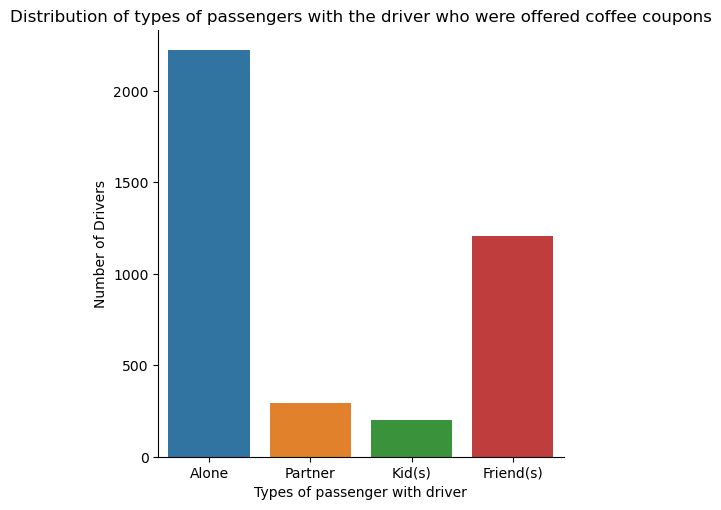

In [574]:
passenger_order=['Alone', 'Partner', 'Kid(s)', 'Friend(s)']
sns.catplot(x='passanger',  kind='count', data=coffee_house_plotdata, order=passenger_order)
plt.xlabel("Types of passenger with driver")
plt.ylabel("Number of Drivers")
plt.title("Distribution of types of passengers with the driver who were offered coffee coupons")
plt.show()

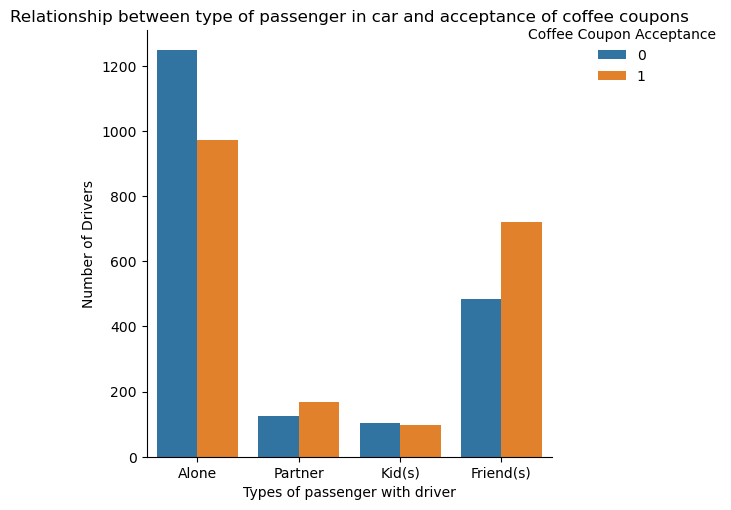

In [575]:
passenger_order=['Alone', 'Partner', 'Kid(s)', 'Friend(s)']
g=sns.catplot(x='passanger',hue='Y', kind='count', data=coffee_house_plotdata, order=passenger_order)
g._legend.set_title("Coffee Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Types of passenger with driver")
plt.ylabel("Number of Drivers")
plt.title("Relationship between type of passenger in car and acceptance of coffee coupons")
plt.show()

In [576]:
#coupon acceptance for drivers who visit coffee houses 1 or more times a month and drive with a friend
coffee_visits_passenger=coffeehouse_data_clean.copy()
coffee_visits_passenger.loc[:,'coffee_1ormore']= coffee_visits_passenger['CoffeeHouse'].apply(lambda x:x in ['4-8','1~3','gt8'])
coffee_visits_passenger.loc[:,'withFriend']=coffee_visits_passenger['passanger'].apply(lambda x:x in ['Friend(s)'])
coffee_visits_passenger['target_group']=coffee_visits_passenger['coffee_1ormore'] & coffee_visits_passenger['withFriend']
coffee_visits_passenger=coffee_visits_passenger.loc[:,['target_group','Y', ]]
coffee_visits_passenger_target=coffee_visits_passenger[coffee_visits_passenger['target_group']]
coffee_visits_passenger_target_acc=coffee_visits_passenger_target['Y'].value_counts().get(1,0)
coffee_visits_passenger_target_noacc=coffee_visits_passenger_target['Y'].value_counts().get(0,0)
coffee_visits_passenger_target_total=coffee_visits_passenger_target_acc+coffee_visits_passenger_target_noacc
coffee_visits_passenger_target_acc_rate=coffee_visits_passenger_target_acc/coffee_visits_passenger_target_total
coffee_visits_passenger_target_acc_percent= "{:.0%}".format(coffee_visits_passenger_target_acc_rate)
print(f"Drivers visited coffee house 1 or more times a month driving with a friend accepted coupons at the rate of {coffee_visits_passenger_target_acc_percent}")
coffee_visits_passenger_notarget=coffee_visits_passenger[coffee_visits_passenger['target_group'] == False]
coffee_visits_passenger_notarget_acc=coffee_visits_passenger_notarget['Y'].value_counts().get(1,0)
coffee_visits_passenger_notarget_noacc=coffee_visits_passenger_notarget['Y'].value_counts().get(0,0)
coffee_visits_passenger_notarget_total=coffee_visits_passenger_notarget_acc+coffee_visits_passenger_notarget_noacc
coffee_visits_passenger_notarget_acc_rate=coffee_visits_passenger_notarget_acc/coffee_visits_passenger_notarget_total
coffee_visits_passenger_notarget_acc_percent= "{:.0%}".format(coffee_visits_passenger_notarget_acc_rate)
print(f"All other drivers accepted coupons at the rate of {coffee_visits_passenger_notarget_acc_percent}")

Drivers visited coffee house 1 or more times a month driving with a friend accepted coupons at the rate of 78%
All other drivers accepted coupons at the rate of 46%


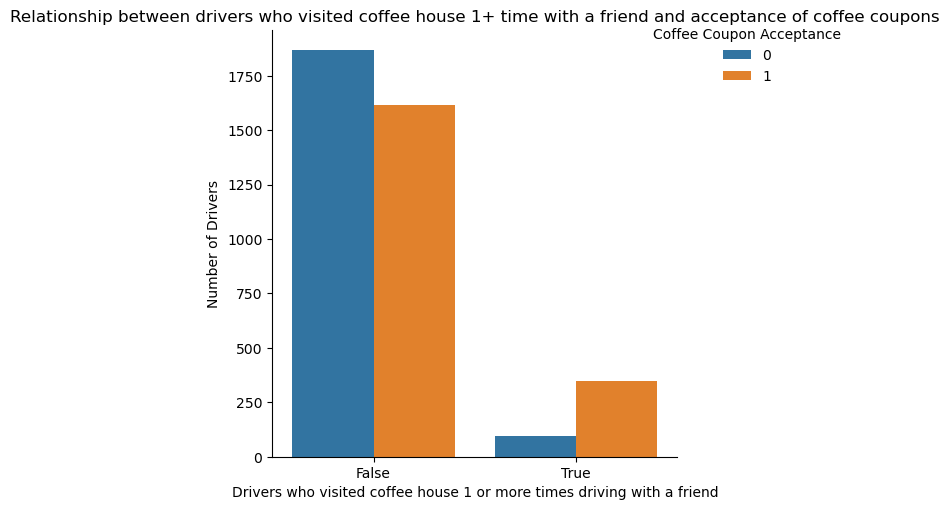

In [577]:
coffee_visits_passenger_plotdata=coffee_visits_passenger.copy()
coffee_visits_passenger_plotdata['Y']=coffee_visits_passenger_plotdata['Y'].astype(str)
g=sns.catplot(x='target_group', hue= 'Y', kind='count', data=coffee_visits_passenger_plotdata)
g._legend.set_title("Coffee Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Drivers who visited coffee house 1 or more times driving with a friend")
plt.ylabel("Number of Drivers")
plt.title("Relationship between drivers who visited coffee house 1+ time with a friend and acceptance of coffee coupons")
plt.show()

<h3>Exploring the relationship between time when coffee house coupon was offered and the acceptance </h3>
<h4>Drivers who go to the coffee house one or more times and are offered coupon at 10 AM are much more likely to accept it 81% vs 47% for others</h4>

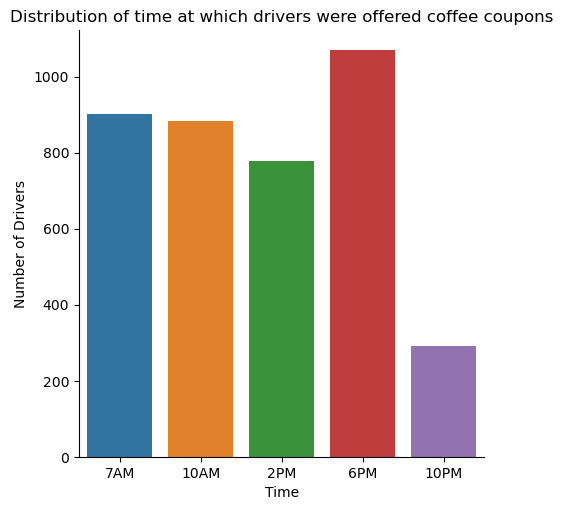

In [579]:
time_order=['7AM', '10AM', '2PM', '6PM', '10PM']
g=sns.catplot(x='time',  kind='count', data=coffee_house_plotdata, order=time_order)
plt.xlabel("Time")
plt.ylabel("Number of Drivers")
plt.title("Distribution of time at which drivers were offered coffee coupons")
plt.show()

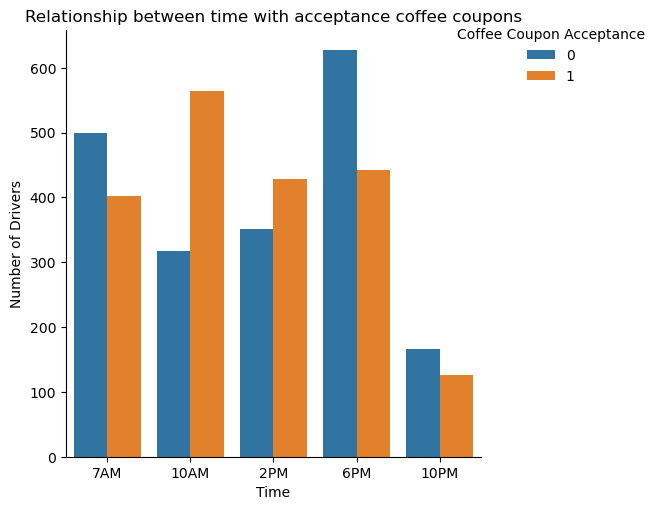

In [580]:
g=sns.catplot(x='time',hue='Y',  kind='count', data=coffee_house_plotdata, order=time_order)
g._legend.set_title("Coffee Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Time")
plt.ylabel("Number of Drivers")
plt.title("Relationship between time with acceptance coffee coupons")
plt.show()

In [581]:
coffee_visits_time=coffeehouse_data_clean.copy()
coffee_visits_time.loc[:,'coffee_1ormore']= coffee_visits_time['CoffeeHouse'].apply(lambda x:x in ['4-8','1~3','gt8'])
coffee_visits_time.loc[:,'time10AM']=coffee_visits_time['time'].apply(lambda x:x in ['10AM'])
coffee_visits_time['target_group']=coffee_visits_time['coffee_1ormore'] & coffee_visits_time['time10AM']
coffee_visits_time=coffee_visits_time.loc[:,['target_group','Y', ]]
coffee_visits_time_target=coffee_visits_time[coffee_visits_time['target_group']]
coffee_visits_time_target_acc=coffee_visits_time_target['Y'].value_counts().get(1,0)
coffee_visits_time_target_noacc=coffee_visits_time_target['Y'].value_counts().get(0,0)
coffee_visits_time_target_total=coffee_visits_time_target_acc+coffee_visits_time_target_noacc
coffee_visits_time_target_acc_rate=coffee_visits_time_target_acc/coffee_visits_time_target_total
coffee_visits_time_target_acc_percent= "{:.0%}".format(coffee_visits_time_target_acc_rate)
print(f"Drivers visited coffee house 1 or more times a month and were offered coupon at 10 AM accepted coupons at the rate of {coffee_visits_time_target_acc_percent}")
coffee_visits_time_notarget=coffee_visits_time[coffee_visits_time['target_group'] == False]
coffee_visits_time_notarget_acc=coffee_visits_time_notarget['Y'].value_counts().get(1,0)
coffee_visits_time_notarget_noacc=coffee_visits_time_notarget['Y'].value_counts().get(0,0)
coffee_visits_time_notarget_total=coffee_visits_time_notarget_acc+coffee_visits_time_notarget_noacc
coffee_visits_time_notarget_acc_rate=coffee_visits_time_notarget_acc/coffee_visits_time_notarget_total
coffee_visits_time_notarget_acc_percent= "{:.0%}".format(coffee_visits_time_notarget_acc_rate)
print(f"All other drivers coupons at the rate of {coffee_visits_time_notarget_acc_percent}")

Drivers visited coffee house 1 or more times a month and were offered coupon at 10 AM accepted coupons at the rate of 81%
All other drivers coupons at the rate of 47%


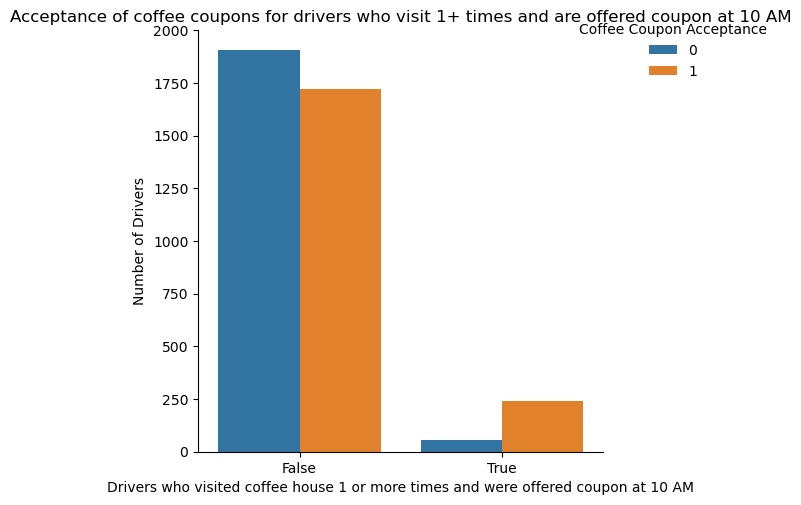

In [582]:
coffee_visits_time_plotdata=coffee_visits_time.copy()
coffee_visits_time_plotdata['Y']=coffee_visits_time_plotdata['Y'].astype(str)
g=sns.catplot(x='target_group', hue= 'Y', kind='count', data=coffee_visits_time_plotdata)
g._legend.set_title("Coffee Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Drivers who visited coffee house 1 or more times and were offered coupon at 10 AM")
plt.ylabel("Number of Drivers")
plt.title("Acceptance of coffee coupons for drivers who visit 1+ times and are offered coupon at 10 AM")
plt.show()

<h3> Exploring the relationship between income and acceptance of coffee coupons</h3>
<h4> Drivers who visit coffee house atleast once a month and have income less than 50K are more likely to accept coupons - 70% vs 48% for others

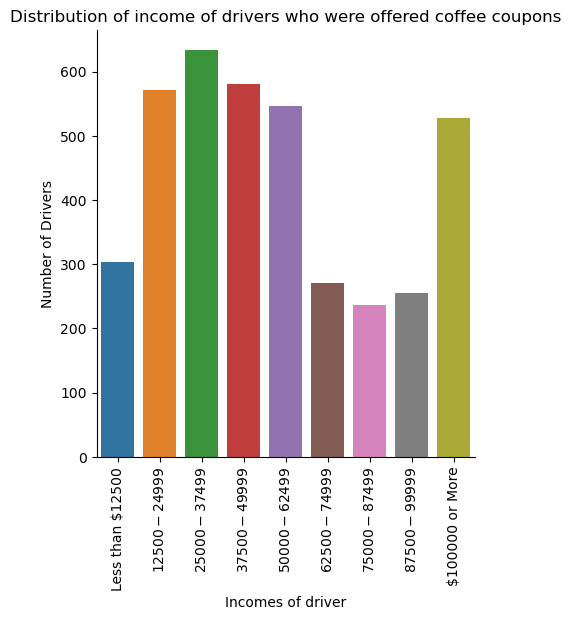

In [584]:
income_order=['Less than $12500','$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
g=sns.catplot(x='income',  kind='count', data=coffee_house_plotdata, order=income_order)
g.set_xticklabels(rotation=90)
plt.xlabel("Incomes of driver")
plt.ylabel("Number of Drivers")
plt.title("Distribution of income of drivers who were offered coffee coupons")
plt.show()

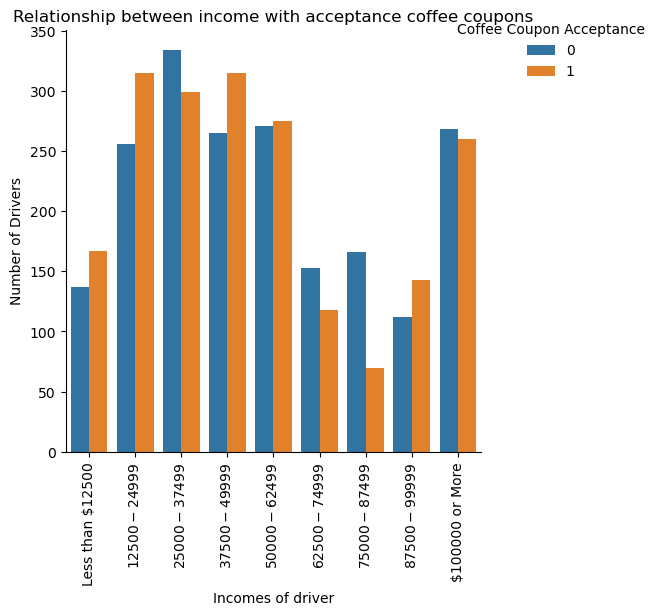

In [585]:
g=sns.catplot(x='income',hue='Y',  kind='count', data=coffee_house_plotdata, order=income_order)
g.set_xticklabels(rotation=90)
g._legend.set_title("Coffee Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Incomes of driver")
plt.ylabel("Number of Drivers")
plt.title("Relationship between income with acceptance coffee coupons")
plt.show()

In [586]:
coffee_visits_income=coffeehouse_data_clean.copy()
coffee_visits_income.loc[:,'coffee_1ormore']= coffee_visits_income['CoffeeHouse'].apply(lambda x:x in ['4-8','1~3','gt8'])
coffee_visits_income.loc[:,'incomeless25K']=coffee_visits_income['income'].apply(lambda x:x in ['Less than $12500','$12500 - $24999'])
coffee_visits_income['target_group']=coffee_visits_income['coffee_1ormore'] & coffee_visits_income['incomeless25K']
coffee_visits_income=coffee_visits_income.loc[:,['target_group','Y', ]]
coffee_visits_income_target=coffee_visits_income[coffee_visits_income['target_group']]
coffee_visits_income_target_acc=coffee_visits_income_target['Y'].value_counts().get(1,0)
coffee_visits_income_target_noacc=coffee_visits_income_target['Y'].value_counts().get(0,0)
coffee_visits_income_target_total=coffee_visits_income_target_acc+coffee_visits_income_target_noacc
coffee_visits_income_target_acc_rate=coffee_visits_income_target_acc/coffee_visits_income_target_total
coffee_visits_income_target_acc_percent= "{:.0%}".format(coffee_visits_income_target_acc_rate)
print(f"Drivers visited coffee house 1 or more times a month and have income less than 25K accepted coupons at the rate of {coffee_visits_income_target_acc_percent}")
coffee_visits_income_notarget=coffee_visits_income[coffee_visits_income['target_group'] == False]
coffee_visits_income_notarget_acc=coffee_visits_income_notarget['Y'].value_counts().get(1,0)
coffee_visits_income_notarget_noacc=coffee_visits_income_notarget['Y'].value_counts().get(0,0)
coffee_visits_income_notarget_total=coffee_visits_income_notarget_acc+coffee_visits_income_notarget_noacc
coffee_visits_income_notarget_acc_rate=coffee_visits_income_notarget_acc/coffee_visits_income_notarget_total
coffee_visits_income_notarget_acc_percent= "{:.0%}".format(coffee_visits_income_notarget_acc_rate)
print(f"All other drivers accepted coupons at the rate of {coffee_visits_income_notarget_acc_percent}")

Drivers visited coffee house 1 or more times a month and have income less than 25K accepted coupons at the rate of 70%
All other drivers accepted coupons at the rate of 48%


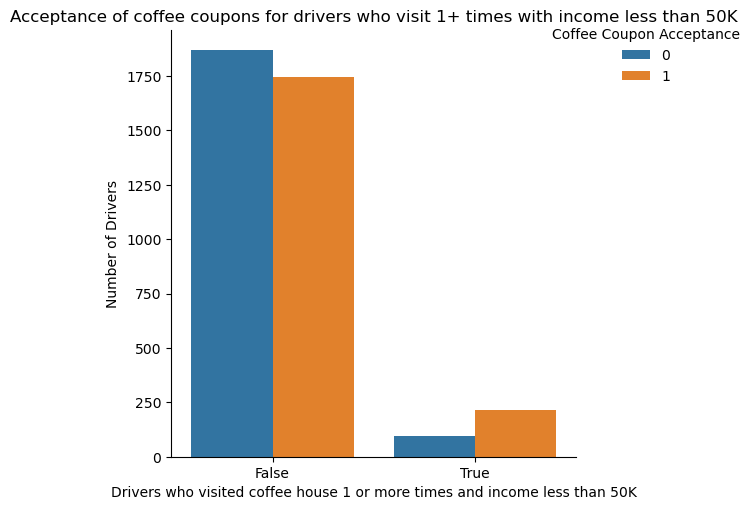

In [587]:
coffee_visits_income_plotdata=coffee_visits_income.copy()
coffee_visits_income_plotdata['Y']=coffee_visits_income_plotdata['Y'].astype(str)
g=sns.catplot(x='target_group', hue= 'Y', kind='count', data=coffee_visits_income_plotdata)
g._legend.set_title("Coffee Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Drivers who visited coffee house 1 or more times and income less than 50K")
plt.ylabel("Number of Drivers")
plt.title("Acceptance of coffee coupons for drivers who visit 1+ times with income less than 50K")
plt.show()

<h3>Exploring the relationship between age of driver and acceptance of coffee coupons</h3>
<h4>Drivers visited coffee house 1 or more times a month and are below 21 are more likely to accept coupons 72% vs 49% for others </h4>

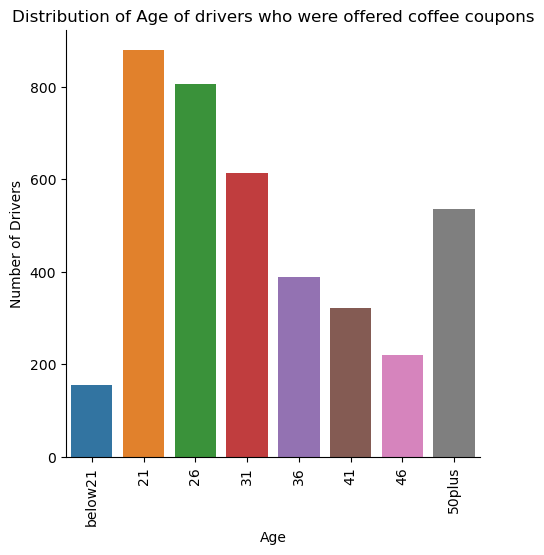

In [589]:
age_order=['below21', '21', '26','31','36', '41', '46', '50plus']
g=sns.catplot(x='age',  kind='count', data=coffee_house_plotdata, order=age_order)
g.set_xticklabels(rotation=90)
plt.xlabel("Age")
plt.ylabel("Number of Drivers")
plt.title("Distribution of Age of drivers who were offered coffee coupons")
plt.show()

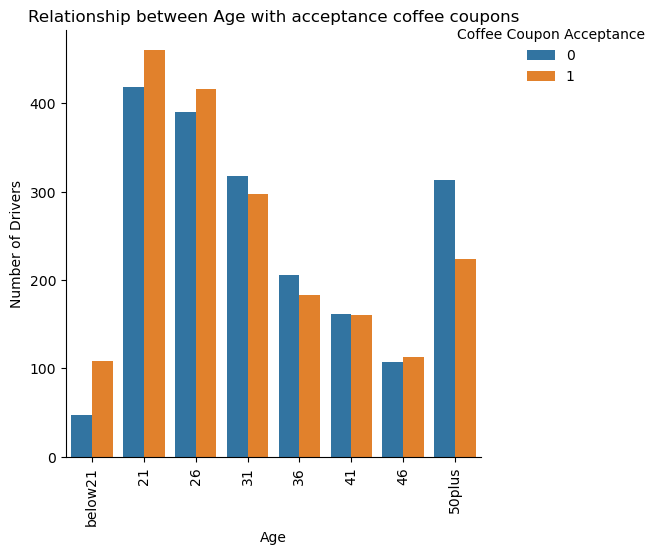

In [590]:
g=sns.catplot(x='age',hue='Y',  kind='count', data=coffee_house_plotdata, order=age_order)
g._legend.set_title("Coffee Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
g.set_xticklabels(rotation=90)
plt.xlabel("Age")
plt.ylabel("Number of Drivers")
plt.title("Relationship between Age with acceptance coffee coupons")
plt.show()

In [591]:
coffee_visits_below21=coffeehouse_data_clean.copy()
coffee_visits_below21.loc[:,'coffee_1ormore']= coffee_visits_below21['CoffeeHouse'].apply(lambda x:x in ['4-8','1~3','gt8'])
coffee_visits_below21.loc[:,'below21']=coffee_visits_below21['age'].apply(lambda x:x in ['below21'])
coffee_visits_below21['target_group']=coffee_visits_below21['coffee_1ormore'] & coffee_visits_below21['below21']
coffee_visits_below21=coffee_visits_below21.loc[:,['target_group','Y', ]]
coffee_visits_below21_target=coffee_visits_below21[coffee_visits_below21['target_group']]
coffee_visits_below21_target_acc=coffee_visits_below21_target['Y'].value_counts().get(1,0)
coffee_visits_below21_target_noacc=coffee_visits_below21_target['Y'].value_counts().get(0,0)
coffee_visits_below21_target_total=coffee_visits_below21_target_acc+coffee_visits_below21_target_noacc
coffee_visits_below21_target_acc_rate=coffee_visits_below21_target_acc/coffee_visits_below21_target_total
coffee_visits_below21_target_acc_percent= "{:.0%}".format(coffee_visits_below21_target_acc_rate)
print(f"Drivers visited coffee house 1 or more times a month and are below 21 accepted coupons at the rate of {coffee_visits_below21_target_acc_percent}")
coffee_visits_below21_notarget=coffee_visits_below21[coffee_visits_below21['target_group']==False]
coffee_visits_below21_notarget_acc=coffee_visits_below21_notarget['Y'].value_counts().get(1,0)
coffee_visits_below21_notarget_noacc=coffee_visits_below21_notarget['Y'].value_counts().get(0,0)
coffee_visits_below21_notarget_total=coffee_visits_below21_notarget_acc+coffee_visits_below21_notarget_noacc
coffee_visits_below21_notarget_acc_rate=coffee_visits_below21_notarget_acc/coffee_visits_below21_notarget_total
coffee_visits_below21_notarget_acc_percent= "{:.0%}".format(coffee_visits_below21_notarget_acc_rate)
print(f"All other drivers accepted coupons at the rate of {coffee_visits_below21_notarget_acc_percent}")

Drivers visited coffee house 1 or more times a month and are below 21 accepted coupons at the rate of 72%
All other drivers accepted coupons at the rate of 49%


<h3>Exploration of relationship between driving destination and coffee coupon acceptance</h3>

In [593]:
dest_dist=coffeehouse_data_clean['destination'].value_counts()
dest_dist

destination
No Urgent Place    2111
Home                911
Work                902
Name: count, dtype: int64

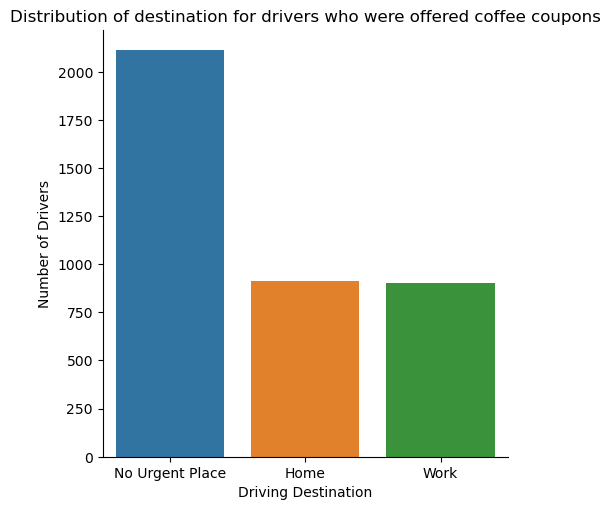

In [594]:
g=sns.catplot(x='destination',  kind='count', data=coffee_house_plotdata)
plt.xlabel("Driving Destination")
plt.ylabel("Number of Drivers")
plt.title("Distribution of destination for drivers who were offered coffee coupons")
plt.show()

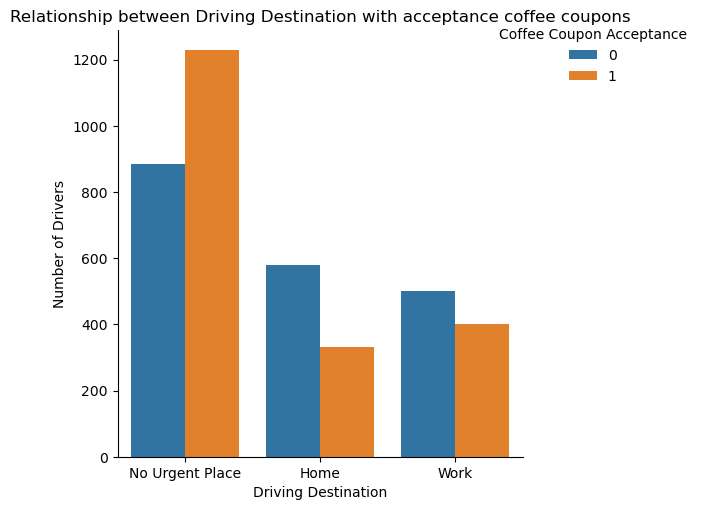

In [595]:
g=sns.catplot(x='destination',hue='Y',  kind='count', data=coffee_house_plotdata)
g._legend.set_title("Coffee Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Driving Destination")
plt.ylabel("Number of Drivers")
plt.title("Relationship between Driving Destination with acceptance coffee coupons")
plt.show()

In [596]:
coffee_visits_nonurgent=coffeehouse_data_clean.copy()
coffee_visits_nonurgent.loc[:,'coffee_1ormore']= coffee_visits_nonurgent['CoffeeHouse'].apply(lambda x:x in ['4-8','1~3','gt8'])
coffee_visits_nonurgent.loc[:,'nonurgent_dest']=coffee_visits_nonurgent['destination'].apply(lambda x:x in ['No Urgent Place'])
coffee_visits_nonurgent['target_group']=coffee_visits_nonurgent['coffee_1ormore'] & coffee_visits_nonurgent['nonurgent_dest']
coffee_visits_nonurgent=coffee_visits_nonurgent.loc[:,['target_group','Y', ]]
coffee_visits_nonurgent_target=coffee_visits_nonurgent[coffee_visits_nonurgent['target_group']]
coffee_visits_nonurgent_target_acc=coffee_visits_nonurgent_target['Y'].value_counts().get(1,0)
coffee_visits_nonurgent_target_noacc=coffee_visits_nonurgent_target['Y'].value_counts().get(0,0)
coffee_visits_nonurgent_target_total=coffee_visits_nonurgent_target_acc+coffee_visits_nonurgent_target_noacc
coffee_visits_nonurgent_target_acc_rate=coffee_visits_nonurgent_target_acc/coffee_visits_nonurgent_target_total
coffee_visits_nonurgent_target_acc_percent= "{:.0%}".format(coffee_visits_nonurgent_target_acc_rate)
print(f"Drivers visited coffee house 1 or more times a month and are driving to a non urgent location {coffee_visits_nonurgent_target_acc_percent}")
coffee_visits_nonurgent_nontarget=coffee_visits_nonurgent[coffee_visits_nonurgent['target_group'] ==  False]
coffee_visits_nonurgent_nontarget_acc=coffee_visits_nonurgent_nontarget['Y'].value_counts().get(1,0)
coffee_visits_nonurgent_nontarget_noacc=coffee_visits_nonurgent_nontarget['Y'].value_counts().get(0,0)
coffee_visits_nonurgent_nontarget_total=coffee_visits_nonurgent_nontarget_acc+coffee_visits_nonurgent_nontarget_noacc
coffee_visits_nonurgent_nontarget_acc_rate=coffee_visits_nonurgent_nontarget_acc/coffee_visits_nonurgent_nontarget_total
coffee_visits_nonurgent_nontarget_acc_percent= "{:.0%}".format(coffee_visits_nonurgent_nontarget_acc_rate)
print(f"All other drivers accepted coupons at the rate of {coffee_visits_nonurgent_nontarget_acc_percent}")

Drivers visited coffee house 1 or more times a month and are driving to a non urgent location 75%
All other drivers accepted coupons at the rate of 44%


<h3>Exploring the relationship between occupation and acceptance of coffee coupons</h3>

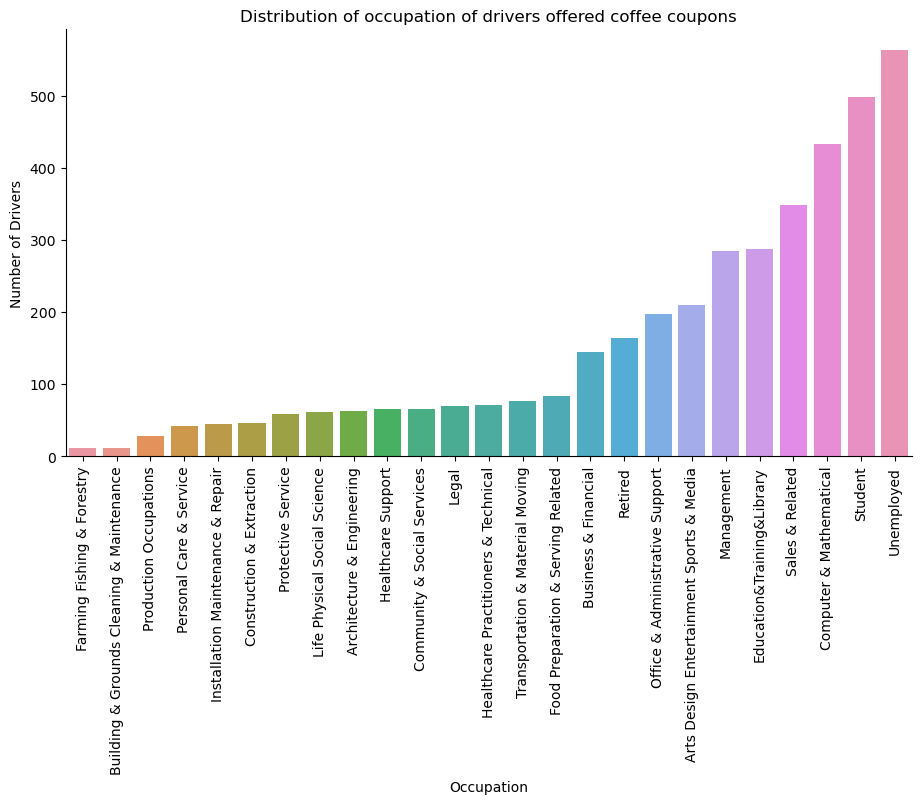

In [598]:
occup_order = coffee_house_plotdata['occupation'].value_counts(ascending=True).index
g=sns.catplot(x='occupation',  kind='count', data=coffee_house_plotdata, order=occup_order, height=5, aspect=2)
g.set_xticklabels(rotation=90)
plt.xlabel("Occupation")
plt.ylabel("Number of Drivers")
plt.title("Distribution of occupation of drivers offered coffee coupons")
plt.show()

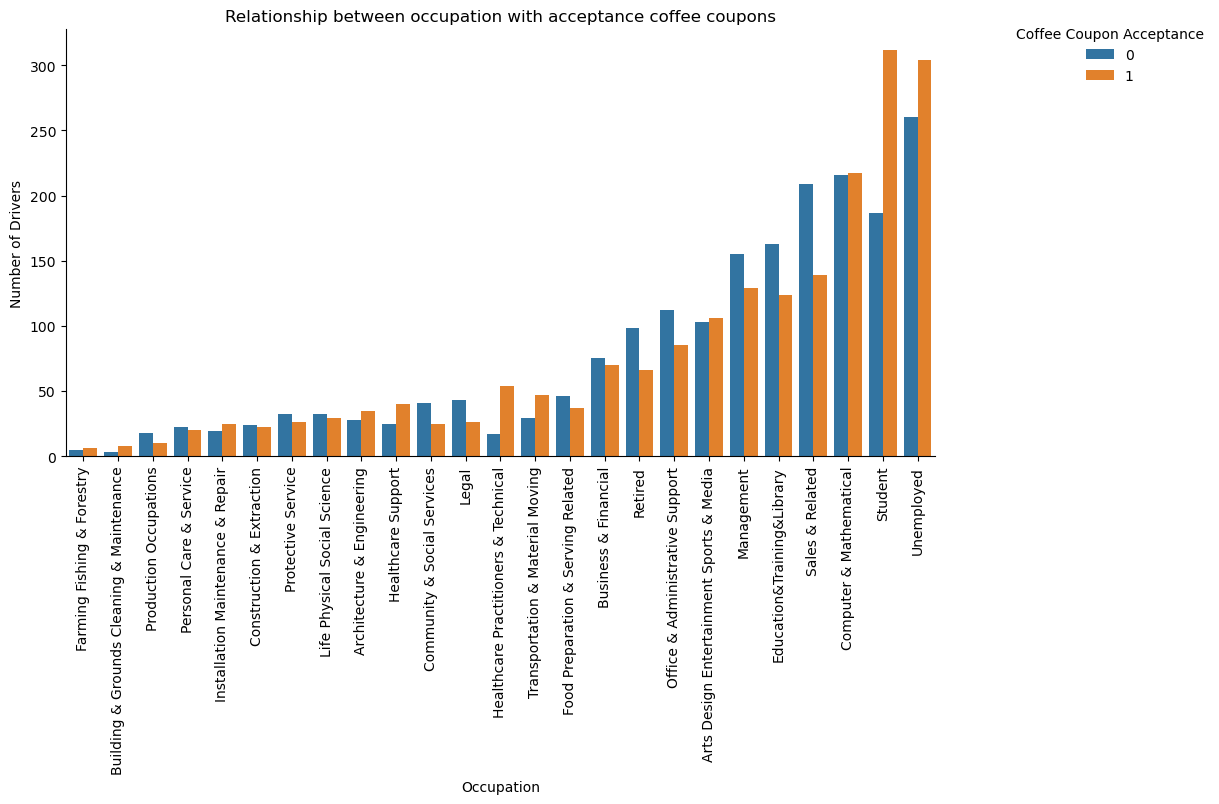

In [599]:
#order = data['category'].value_counts(ascending=True).index
g=sns.catplot(x='occupation',  kind='count', hue='Y',  data=coffee_house_plotdata, order=occup_order, height=5, aspect=2)
g._legend.set_title("Coffee Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
g.set_xticklabels(rotation=90)
plt.xlabel("Occupation")
plt.ylabel("Number of Drivers")
plt.title("Relationship between occupation with acceptance coffee coupons")
plt.show()

In [600]:
coffee_visits_student=coffeehouse_data_clean.copy()
coffee_visits_student.loc[:,'coffee_1ormore']= coffee_visits_student['CoffeeHouse'].apply(lambda x:x in ['4-8','1~3','gt8'])
coffee_visits_student.loc[:,'student']=coffee_visits_student['occupation'].apply(lambda x:x in ['Student'])
coffee_visits_student['target_group']=coffee_visits_student['coffee_1ormore'] & coffee_visits_student['student']
coffee_visits_student=coffee_visits_student.loc[:,['target_group','Y']]
coffee_visits_student_target=coffee_visits_student[coffee_visits_student['target_group']]
coffee_visits_student_target_acc=coffee_visits_student_target['Y'].value_counts().get(1,0)
coffee_visits_student_target_noacc=coffee_visits_student_target['Y'].value_counts().get(0,0)
coffee_visits_student_target_total=coffee_visits_student_target_acc+coffee_visits_student_target_noacc
coffee_visits_student_target_acc_rate=coffee_visits_student_target_acc/coffee_visits_student_target_total
coffee_visits_student_target_acc_percent= "{:.0%}".format(coffee_visits_student_target_acc_rate)
print(f"Drivers visited coffee house 1 or more times a month and are students accepted coupons at the rate of {coffee_visits_student_target_acc_percent}")
coffee_visits_student_notarget=coffee_visits_student[coffee_visits_student['target_group'] == False]
coffee_visits_student_notarget_acc=coffee_visits_student_notarget['Y'].value_counts().get(1,0)
coffee_visits_student_notarget_noacc=coffee_visits_student_notarget['Y'].value_counts().get(0,0)
coffee_visits_student_notarget_total=coffee_visits_student_notarget_acc+coffee_visits_student_notarget_noacc
coffee_visits_student_notarget_acc_rate=coffee_visits_student_notarget_acc/coffee_visits_student_notarget_total
coffee_visits_student_notarget_acc_percent= "{:.0%}".format(coffee_visits_student_notarget_acc_rate)
print(f"All other drivers accepted coupons at the rate of {coffee_visits_student_notarget_acc_percent}")

Drivers visited coffee house 1 or more times a month and are students accepted coupons at the rate of 67%
All other drivers accepted coupons at the rate of 49%


<h3>Explored impact of the following factors and they were not predictive of coffee coupon acceptance</h3>
<h5>Temperature</h5>
<h5>Education</h5> 
<h5>Marital Status</h5> 
<h5>Weather</h5> 
<h5>Having Kids</h5>
<h5>Time from Coupon location 5/15/25 min</h5>
<h5>Driving direction - same or opposite</h5>

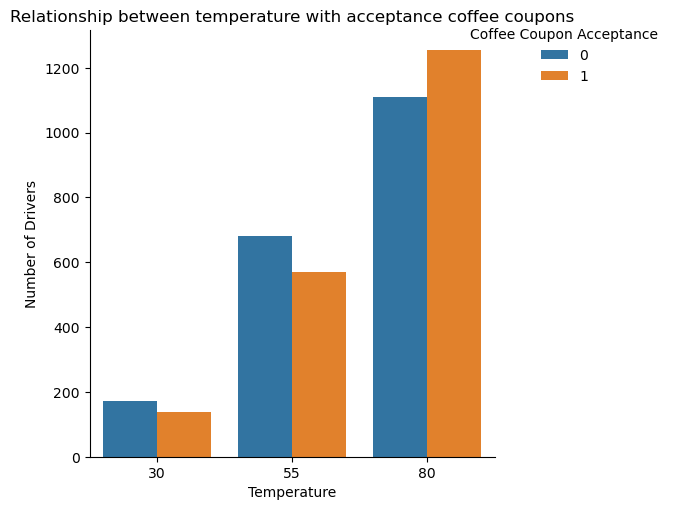

In [602]:
g=sns.catplot(x='temperature',hue='Y',  kind='count', data=coffee_house_plotdata)
g._legend.set_title("Coffee Coupon Acceptance")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, 1))
plt.xlabel("Temperature")
plt.ylabel("Number of Drivers")
plt.title("Relationship between temperature with acceptance coffee coupons")
plt.show()

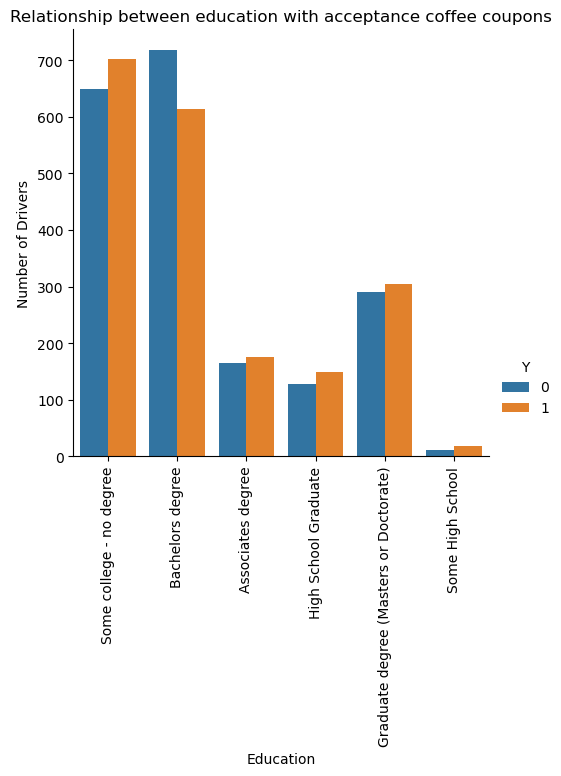

In [603]:
g=sns.catplot(x='education',hue='Y',  kind='count', data=coffee_house_plotdata)
g.set_xticklabels(rotation=90)
plt.xlabel("Education")
plt.ylabel("Number of Drivers")
plt.title("Relationship between education with acceptance coffee coupons")
plt.show()

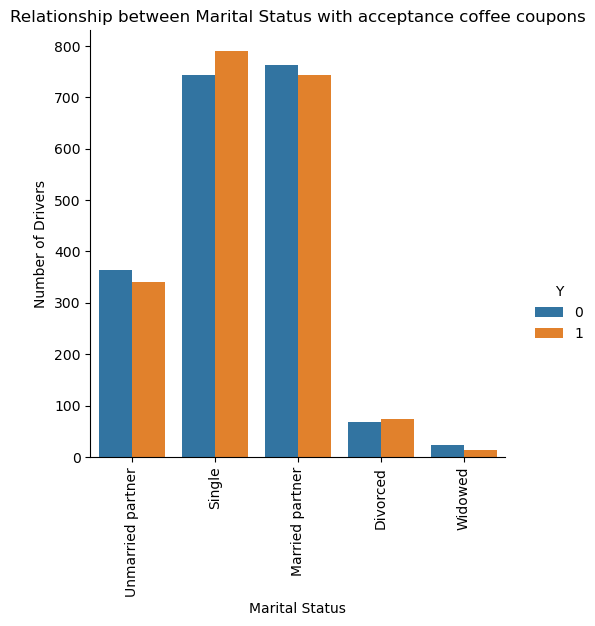

In [604]:
g=sns.catplot(x='maritalStatus',hue='Y',  kind='count', data=coffee_house_plotdata)
g.set_xticklabels(rotation=90)
plt.xlabel("Marital Status")
plt.ylabel("Number of Drivers")
plt.title("Relationship between Marital Status with acceptance coffee coupons")
plt.show()

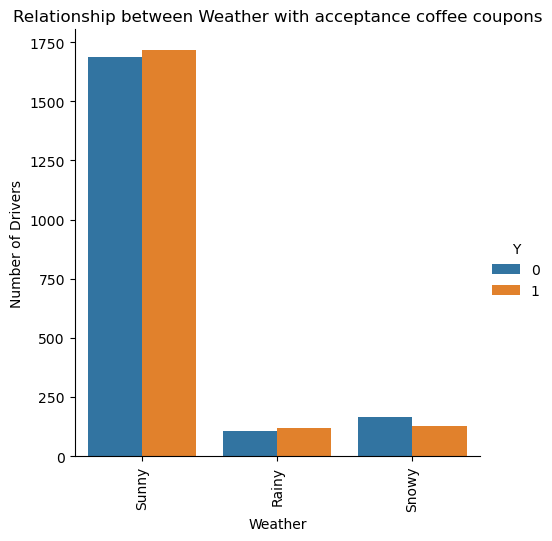

In [605]:
g=sns.catplot(x='weather',hue='Y',  kind='count', data=coffee_house_plotdata)
g.set_xticklabels(rotation=90)
plt.xlabel("Weather")
plt.ylabel("Number of Drivers")
plt.title("Relationship between Weather with acceptance coffee coupons")
plt.show()

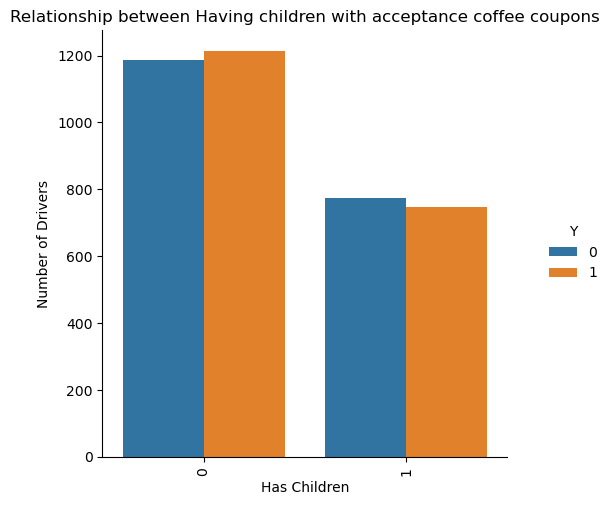

In [606]:
g=sns.catplot(x='has_children',hue='Y',  kind='count', data=coffee_house_plotdata)
g.set_xticklabels(rotation=90)
plt.xlabel("Has Children")
plt.ylabel("Number of Drivers")
plt.title("Relationship between Having children with acceptance coffee coupons")
plt.show()

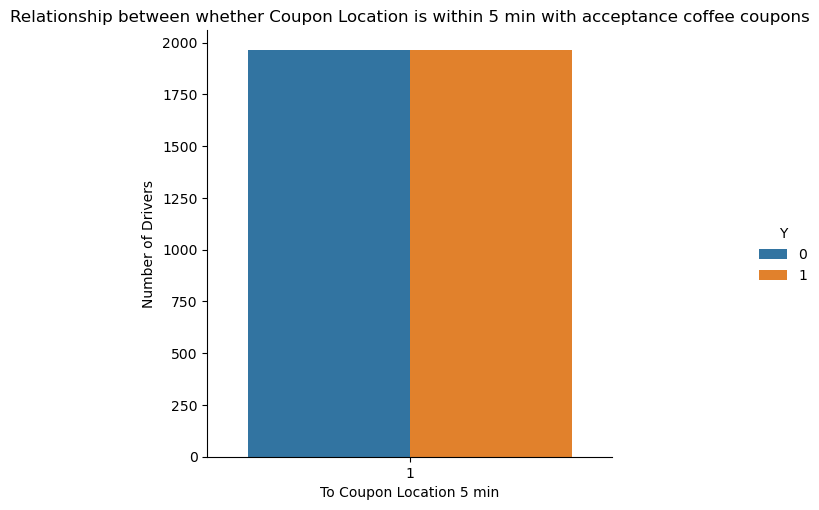

In [607]:
g=sns.catplot(x='toCoupon_GEQ5min',hue='Y',  kind='count', data=coffee_house_plotdata)
plt.xlabel("To Coupon Location 5 min")
plt.ylabel("Number of Drivers")
plt.title("Relationship between whether Coupon Location is within 5 min with acceptance coffee coupons")
plt.show()

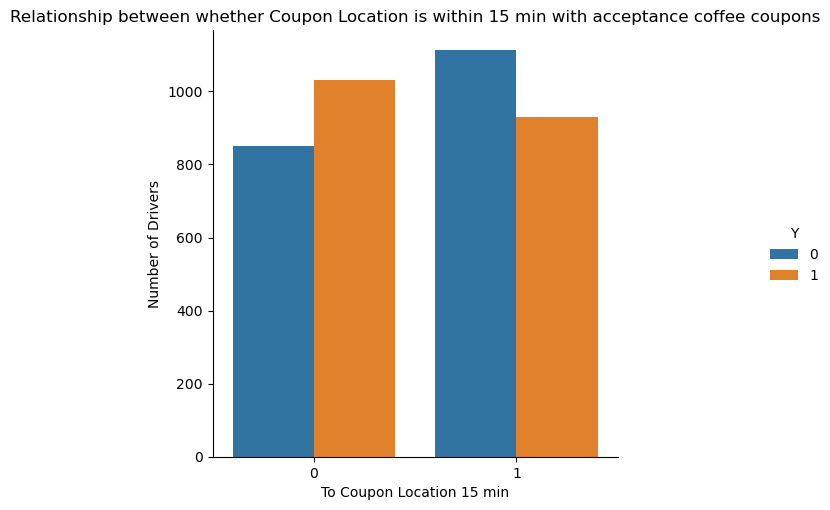

In [608]:
g=sns.catplot(x='toCoupon_GEQ15min',hue='Y',  kind='count', data=coffee_house_plotdata)
plt.xlabel("To Coupon Location 15 min")
plt.ylabel("Number of Drivers")
plt.title("Relationship between whether Coupon Location is within 15 min with acceptance coffee coupons")
plt.show()

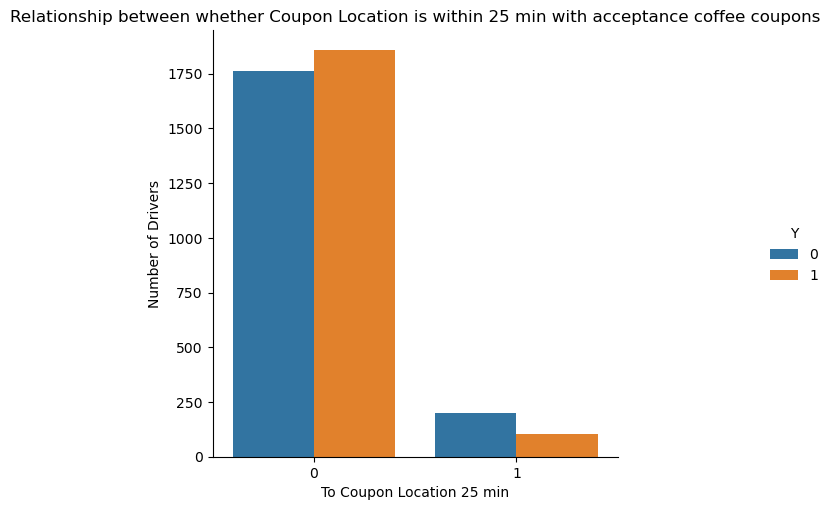

In [609]:
g=sns.catplot(x='toCoupon_GEQ25min',hue='Y',  kind='count', data=coffee_house_plotdata)
plt.xlabel("To Coupon Location 25 min")
plt.ylabel("Number of Drivers")
plt.title("Relationship between whether Coupon Location is within 25 min with acceptance coffee coupons")
plt.show()

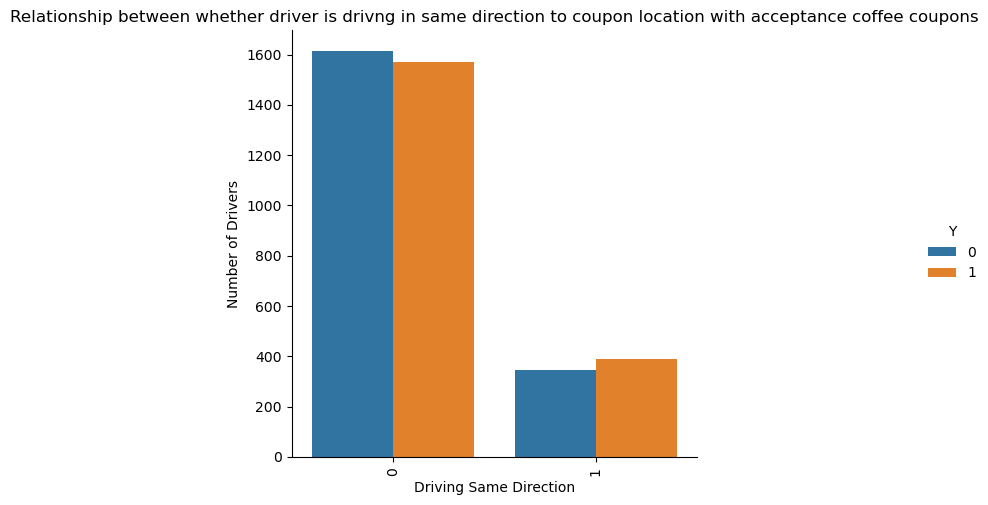

In [610]:
g=sns.catplot(x='direction_same',hue='Y',  kind='count', data=coffee_house_plotdata)
g.set_xticklabels(rotation=90)
plt.xlabel("Driving Same Direction")
plt.ylabel("Number of Drivers")
plt.title("Relationship between whether driver is drivng in same direction to coupon location with acceptance coffee coupons")
plt.show()

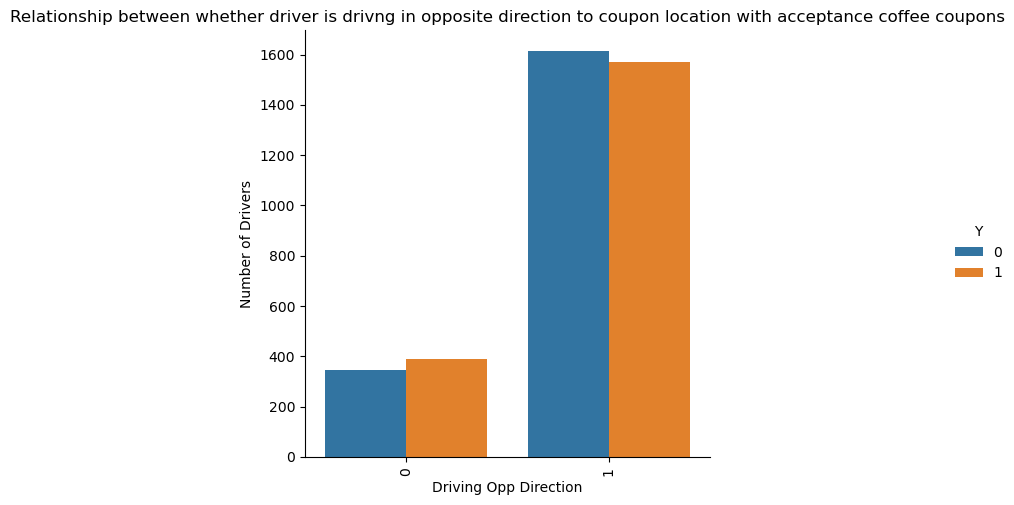

In [611]:
g=sns.catplot(x='direction_opp',hue='Y',  kind='count', data=coffee_house_plotdata)
g.set_xticklabels(rotation=90)
plt.xlabel("Driving Opp Direction")
plt.ylabel("Number of Drivers")
plt.title("Relationship between whether driver is drivng in opposite direction to coupon location with acceptance coffee coupons")
plt.show()